<a href="https://colab.research.google.com/github/JSEFERINO/JHSERIES2/blob/main/08_Series_Tiempo_Cap6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Curso Introductorio Series de Tiempo por Julio Hurtado Márquez**
## **Text: Time Series Forecasting in Python - MARCO PEIXEIRO**
# **Parte 2. Pronósticos con modelos estadísticos**

# **Capítulo 6. Modelado de series temporales complejas - $ARMA(p,q)$**
## **Este capítulo cubre**
+ Examinando el *modelo de media móvil autorregresiva o $ARMA ( p , q )$*
+ Experimentando con las limitaciones de los gráficos $ACF$ y $PACF$
+ Seleccionando el mejor modelo con el *criterio de información de Akaike (AIC)*
+ Análisis de un modelo de series de tiempo mediante análisis residual.
+ Construyendo un procedimiento de modelado general.
+ Pronosticos  utilizando el modelo $ARMA( p , q )$

## **Introducción**
+ En el capítulo 4 cubrimos el proceso de media móvil, denotado como $MA( q )$, donde $q$ es el orden.
+ Aprendiste que *en un proceso de media móvil, el valor presente depende linealmente de la media, el término de error actual y los términos de error pasados.*
+ El orden $q$ se puede inferir utilizando el gráfico ACF, donde los coeficientes de autocorrelación serán significativos hasta el retraso $q$ únicamente.
+ En el caso de que *el gráfico $ACF$ muestre un patrón que decae lentamente o un patrón sinusoidal, es posible que esté en presencia de un proceso autorregresivo en lugar de un proceso de media móvil.*

+ Esto nos llevó al capítulo 5, en el que cubrimos *el proceso autorregresivo, denotado como $AR(p)$* , donde $p$ es el orden.
+ *En el proceso autorregresivo, el valor presente depende linealmente de su propio valor pasado.*
+ En otras palabras, *se trata de una regresión de la variable contra sí misma*.
+ Viste que podemos inferir el orden $p$ usando el gráfico $PACF$, donde los coeficientes de autocorrelación parcial serán significativos hasta el retraso $p$ únicamente.
+ Por lo tanto, estamos en un punto en el que podemos identificar, modelar y predecir:
 +  un *paseo aleatorio*,
 +  un *proceso de media móvil puro* y
 +  un *proceso autorregresivo puro*.

+ **Figura 6.1 Pasos para identificar y modelar un paseo aleatorio, un proceso de media móvil y un proceso autorregresivo**.

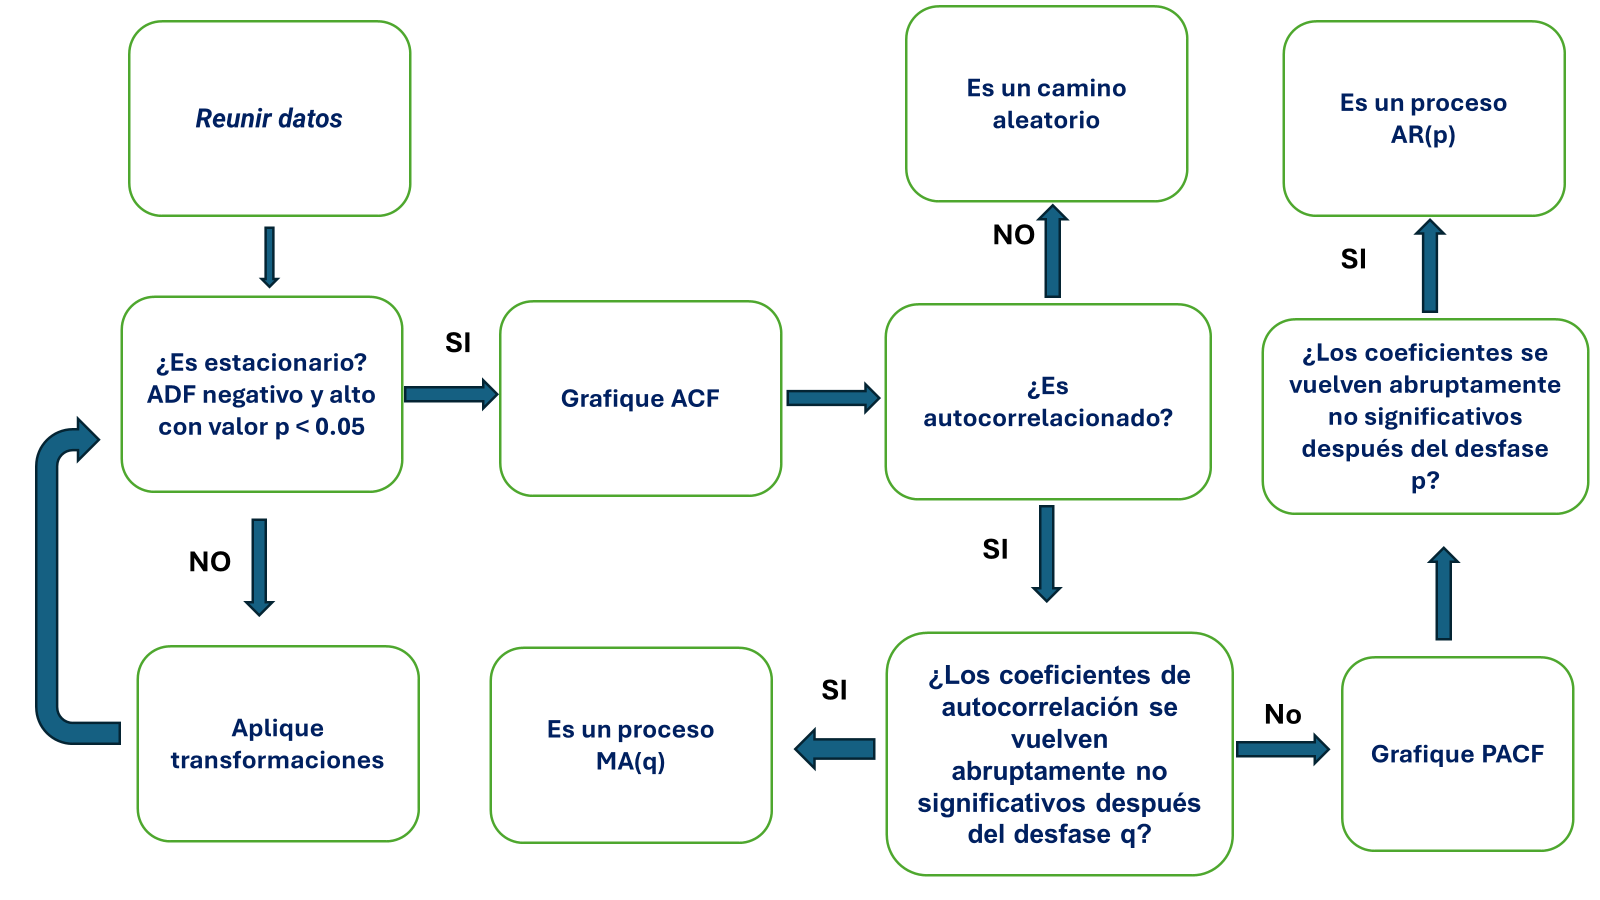

## **¿Cuando estamos en presencia de una combinación $MA(q)$ con $AR(p)$?**
+ El siguiente paso es aprender a tratar series de tiempo en las que no se puede inferir un orden a partir del gráfico ACF ni del gráfico PACF.
+ Esto significa que ambas figuras exhiben un patrón que decae lentamente o un patrón sinusoidal.
+ En tal caso, *estamos en presencia de un proceso de media móvil autorregresiva o ARMA.*
+ Esto denota la combinación de los procesos autorregresivo y de media móvil que cubrimos en los dos capítulos anteriores.
+ En este capítulo, examinaremos el proceso de promedio móvil autorregresivo, $ARMA(p,q)$, donde $p$ denota el orden de la parte autorregresiva y $q$ denota el orden de la parte de promedio móvil.
+ Además, el uso de los gráficos $ACF$ y $PACF$ para determinar los órdenes $q$ y $p$, respectivamente, *se vuelve difícil, ya que ambos gráficos mostrarán un patrón de decaimiento lento o sinusoidal*.
+ Por lo tanto, *definiremos un procedimiento de modelado general que nos permitirá modelar series de tiempo tan complejas.*
+ Este procedimiento implica la selección del modelo utilizando el *criterio de información de Akaike (AIC)*, que determinará la combinación óptima de $p$ y $q$ para nuestra serie.
+ Luego debemos evaluar *la validez del modelo* utilizando el análisis de residuos estudiando **el correlograma, el gráfico Q-Q y el gráfico de densidad de los residuos del modelo** para evaluar si se parecen mucho al ***ruido blanco***.
+ ***Si ese es el caso, podemos pasar a pronosticar nuestra serie de tiempo utilizando el modelo ARMA(p,q).***
+ En este capítulo se presentarán los conocimientos básicos para pronosticar series de tiempo complejas.
+ Todos los conceptos introducidos aquí se reutilizarán en capítulos posteriores cuando comencemos a modelar series de tiempo no estacionarias e incorporemos estacionalidad y variables exógenas.

## **6.1. Ejemplo ilustrativo - Pronósticos del uso de ancho de banda para centros de datos**
+ *Suponga que tiene la tarea de predecir el uso de ancho de banda para un centro de datos grande.*
+ *El ancho de banda se define como la velocidad máxima de datos que se pueden transferir.*
+ *Su unidad base son los bits por segundo (Bps).*
+ *El pronóstico del uso del ancho de banda permite a los centros de datos gestionar mejor sus recursos informáticos.*
+ *En el caso de que se espere un uso menor del ancho de banda, pueden apagar algunos de sus recursos informáticos.*
+ *Esto a su vez reduce los gastos y permite el mantenimiento.*
+ *Por otro lado, si se espera que aumente el uso del ancho de banda, entonces pueden dedicar los recursos necesarios para sostener la demanda y garantizar una baja latencia, manteniendo así a sus clientes satisfechos.*
+ *Para esta situación, hay 10.000 puntos de datos que representan el uso de ancho de banda por hora a partir del 1 de enero de 2019*.
+ *Aquí, el ancho de banda se mide en megabits por segundo (Mbps), lo que equivale a $10^6$ bps.
+ **Podemos visualizar nuestra serie temporal en la figura 6.1.**

### **Nuestra libreria base**

In [ ]:
import itertools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
import sklearn.metrics

### **Paso 1. Importando los datos**

In [ ]:
## **Paso 1. Importando los datos**
import pandas as pd

df = pd.read_csv('/content/bandwidth.csv')

df.head() # Muestra las primeras cinco filas de datos.


,hourly_bandwidth
0,1000.496714
1,1000.969408
2,1002.046019
3,1004.702118
4,1007.447816


### **Paso 2. Graficando los datos**

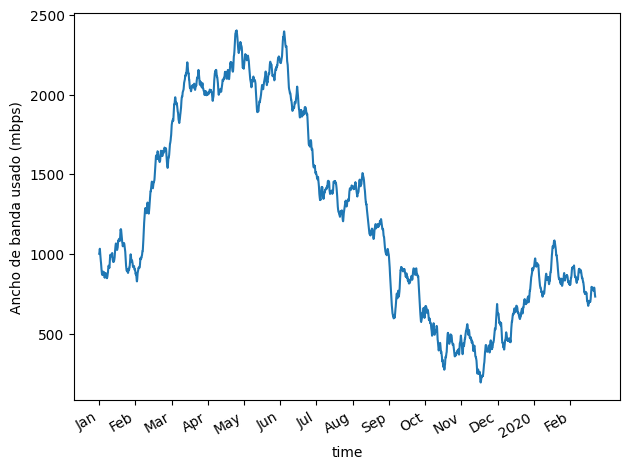

In [ ]:
### **Paso 2. Graficando los datos**
fig, ax = plt.subplots()

ax.plot(df.hourly_bandwidth)
ax.set_xlabel('time')
ax.set_ylabel('Ancho de banda usado (mbps)')

plt.xticks(
    np.arange(0, 10000, 730),
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
     'Aug', 'Sep', 'Oct', 'Nov', 'Dec', '2020', 'Feb']
)

fig.autofmt_xdate()
plt.tight_layout()

+ **Figura 6.1 Uso de ancho de banda por hora en un centro de datos desde el 1 de enero de 2019. El conjunto de datos contiene 10000 puntos.**

### **Paso 3. Este será el procedimiento para analizar luego la serie**
+ *En la figura 6.1 se pueden ver tendencias a largo plazo a lo largo del tiempo, lo que significa que es probable que esta serie no sea estacionaria, por lo que debemos aplicar una transformación.*
+ *Además, no parece haber un comportamiento cíclico, por lo que podemos descartar la presencia de estacionalidad en nuestra serie.*
+ Para pronosticar el uso del ancho de banda, necesitamos identificar el proceso subyacente en nuestra serie.
+ Por lo tanto, seguiremos los pasos que definimos en el capítulo 5.
+ De esa manera, podemos verificar si tenemos un recorrido aleatorio, un proceso de promedio móvil o un proceso autorregresivo.
+ Los pasos se muestran en la figura 6.2.
+ El primer paso es recopilar los datos, lo que ya se hizo en este caso.
+ Luego debemos determinar si nuestra serie es estacionaria o no.
+ La presencia de una tendencia en el gráfico indica que nuestra serie no es estacionaria. Sin embargo, aplicaremos la prueba ADF para verificar la estacionariedad y aplicaremos una transformación en consecuencia.
+ Luego, trazaremos la función ACF y descubriremos que hay coeficientes de autocorrelación significativos después del desfase 0, lo que significa que no es un recorrido aleatorio.
+ Sin embargo, observaremos que los coeficientes decaen lentamente. No se vuelven abruptamente no significativos después de un cierto desfase, lo que significa que no es un proceso puramente de promedio móvil.
+ Luego pasaremos a trazar la función PACF.
+ Esta vez notaremos un patrón sinusoidal, lo que significa que los coeficientes no se vuelven abruptamente no significativos después de un cierto desfase.
+ Esto nos llevará a la conclusión de que tampoco es un proceso puramente autorregresivo.
+ Por lo tanto, debe ser una combinación de procesos autorregresivos y de promedio móvil, lo que da como resultado un proceso autorregresivo de promedio móvil que se puede modelar con el modelo $ARMA(p,q)$, donde $p$ es el orden del proceso autorregresivo y $q$ es el orden del proceso de promedio móvil.
+ Es difícil usar los gráficos $ACF$ y $PACF$ para encontrar respectivamente $p$ y $q$, por lo que ajustaremos muchos modelos $ARMA(p,q)$ con diferentes combinaciones de valores para $p$ y $q$.
+ Luego seleccionaremos un modelo de acuerdo con el criterio de *información de Akaike* y evaluaremos su viabilidad analizando sus residuos.
+ Idealmente, los residuos de un modelo tendrán características similares al **ruido blanco**.
+ Entonces podremos utilizar este modelo para hacer pronósticos.
+ En este ejemplo, pronosticaremos el uso del ancho de banda por hora durante las próximas dos horas.

+ **Figura 6.2 Pasos para identificar un paseo aleatorio, un proceso de promedio móvil y un proceso autorregresivo**

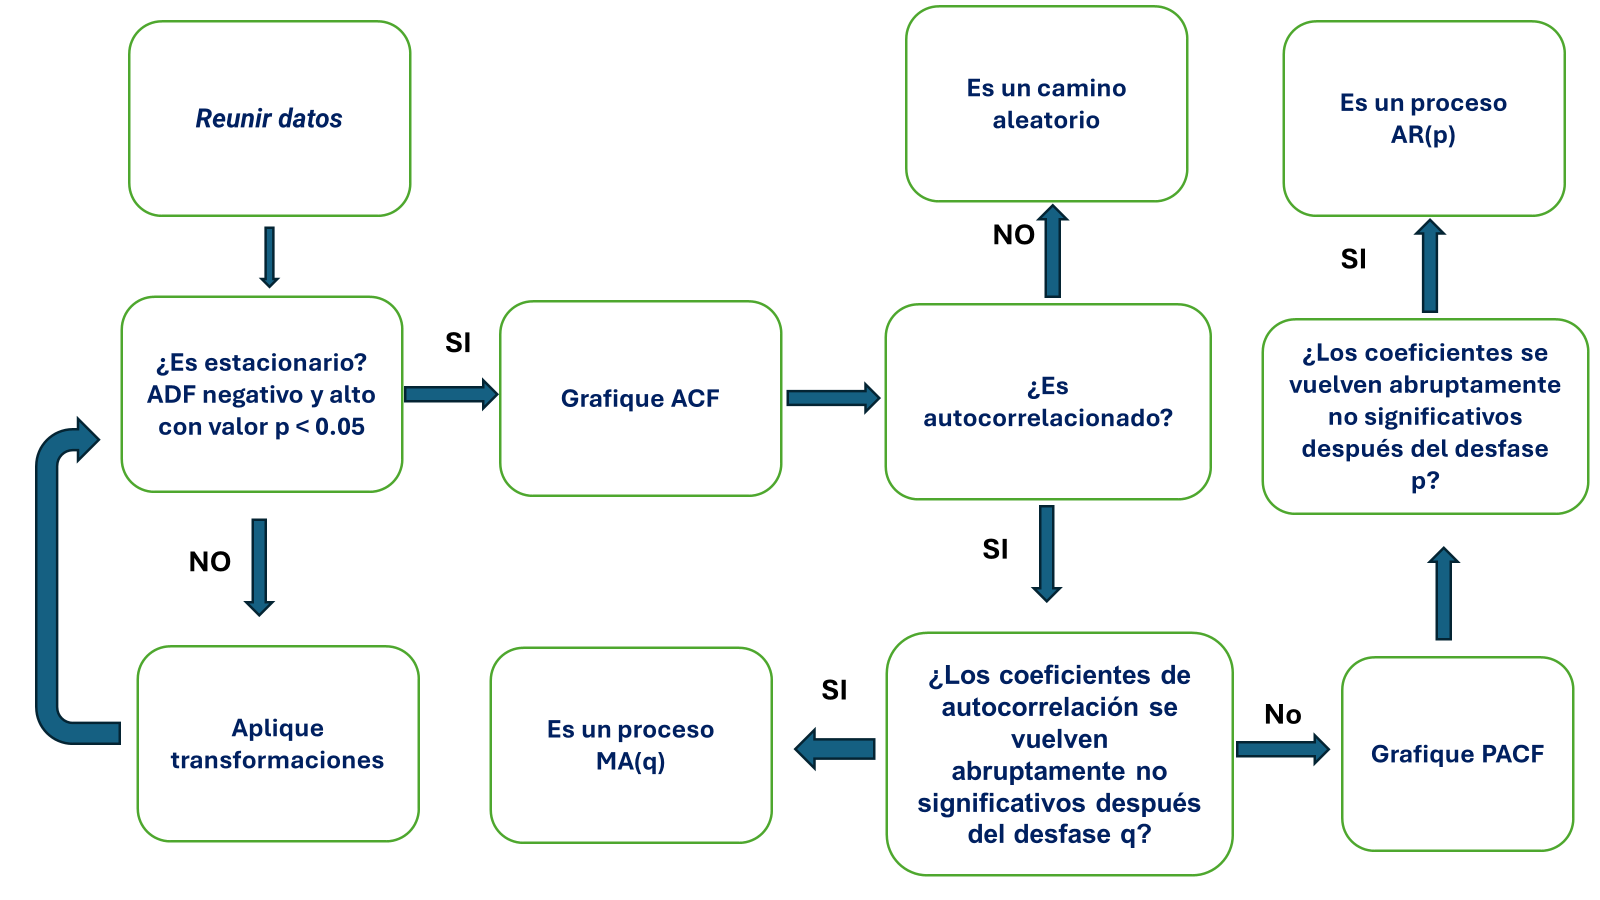

# **6.2. Examinando el proceso de media móvil autorregresiva**
+ *Un proceso de media móvil autorregresiva es la combinación del proceso autorregresivo y el proceso de media móvil.*
+ Afirma que el valor presente depende linealmente de sus propios valores anteriores y de una constante, al igual que en un proceso autorregresivo, así como de la media de la serie, el término de error actual y los términos de error pasados, como en un proceso de media móvil.
+ El proceso de media móvil autorregresiva se denota como $ARMA(p,q)$, donde *p* es el orden de la parte autorregresiva y *q* es el orden de la parte de media móvil.
+ Matemáticamente, el proceso *ARMA(p,q)* se expresa como una combinación lineal de una constante *C*, los valores pasados ​​de la serie $y_{t–p}$, la media de la serie $μ$, los términos de error pasados $​​ϵ_{t–q}$ y el término de error actual $ϵ_t$, como se muestra en la ecuación 6.1.

+ **Ecuación 6.1**
$$AR(p): y_t = C + ϕ_1* y_{t –1} + ϕ_2*y_{t –2} + ⋅⋅⋅ + ϕ_p*y_{t–p} + ϵ_t$$
$$MA(q): y_t = μ+ ϵ_t+ θ_1*ϵ_{t –1} + θ_2*ϵ_{t –2} + ⋅⋅⋅ + θ_q*ϵ_{t – q}$$
$$ARMA(p,q): y_t = C + ϕ_1* y_{t –1} + ϕ_2*y_{t –2} + ⋅⋅⋅ + ϕ_p*y_{t–p} + ϵ_t+μ+ θ_1*ϵ_{t –1} + θ_2*ϵ_{t –2} + ⋅⋅⋅ + θ_q*ϵ_{t – q}$$


### **NOTAS**
+ Un proceso $ARMA(0,q)=MA(q)$
+ Un proceso $ARMA(p,0)=AR(P)$.

+ **Ecuación 6.2**
$$AR(1) := y_t = C + ϕ_1*y_{t –1} + ϵ_t$$
+ **Ecuación 6.3**
$$MA(1): y_t = μ+ ϵ_t+ θ_1*ϵ_{t –1} $$
+ **Ecuación 6.4**
$$ARMA(1,1) := y_t = C + ϕ_1*y_{t –1} + ϵ_t+μ+  θ_1*ϵ_{t –1} $$

+ **Ecuación 6.5**
$$AR(2) := y_t = C + ϕ_1*y_{t –1} + ϕ_2*y_{t –2} + ϵ_t$$

+ **Ecuación 6.6**
$$ARMA(2,1) := y_t = C + ϕ_1*y_{t –1} + ϕ_2*y_{t –2} + ϵ_t+μ+  θ_1*ϵ_{t –1} $$

# **6.3. Identificación de un proceso ARMA estacionario**
+ Para modelar y pronosticar un proceso *ARMA(p,q)*, necesitamos encontrar los órdenes *p* y *q* .
+ De esa manera, podemos utilizar un modelo ARMA(p,q) para ajustarnos a los datos disponibles y producir pronósticos.

+ **6.3 Identificación de un proceso ARMA estacionario Figura 6.3 Pasos para identificar un paseo aleatorio, un proceso de media móvil MA(q), un proceso autorregresivo AR( p ) y un proceso de media móvil autorregresiva $ARMA(p , q )$**

+ **Figura 6.3 Pasos para identificar un paseo aleatorio, un proceso de promedio móvil MA(q), un proceso autorregresivo AR(p) y un proceso de promedio móvil autorregresivo ARMA(p,q).**

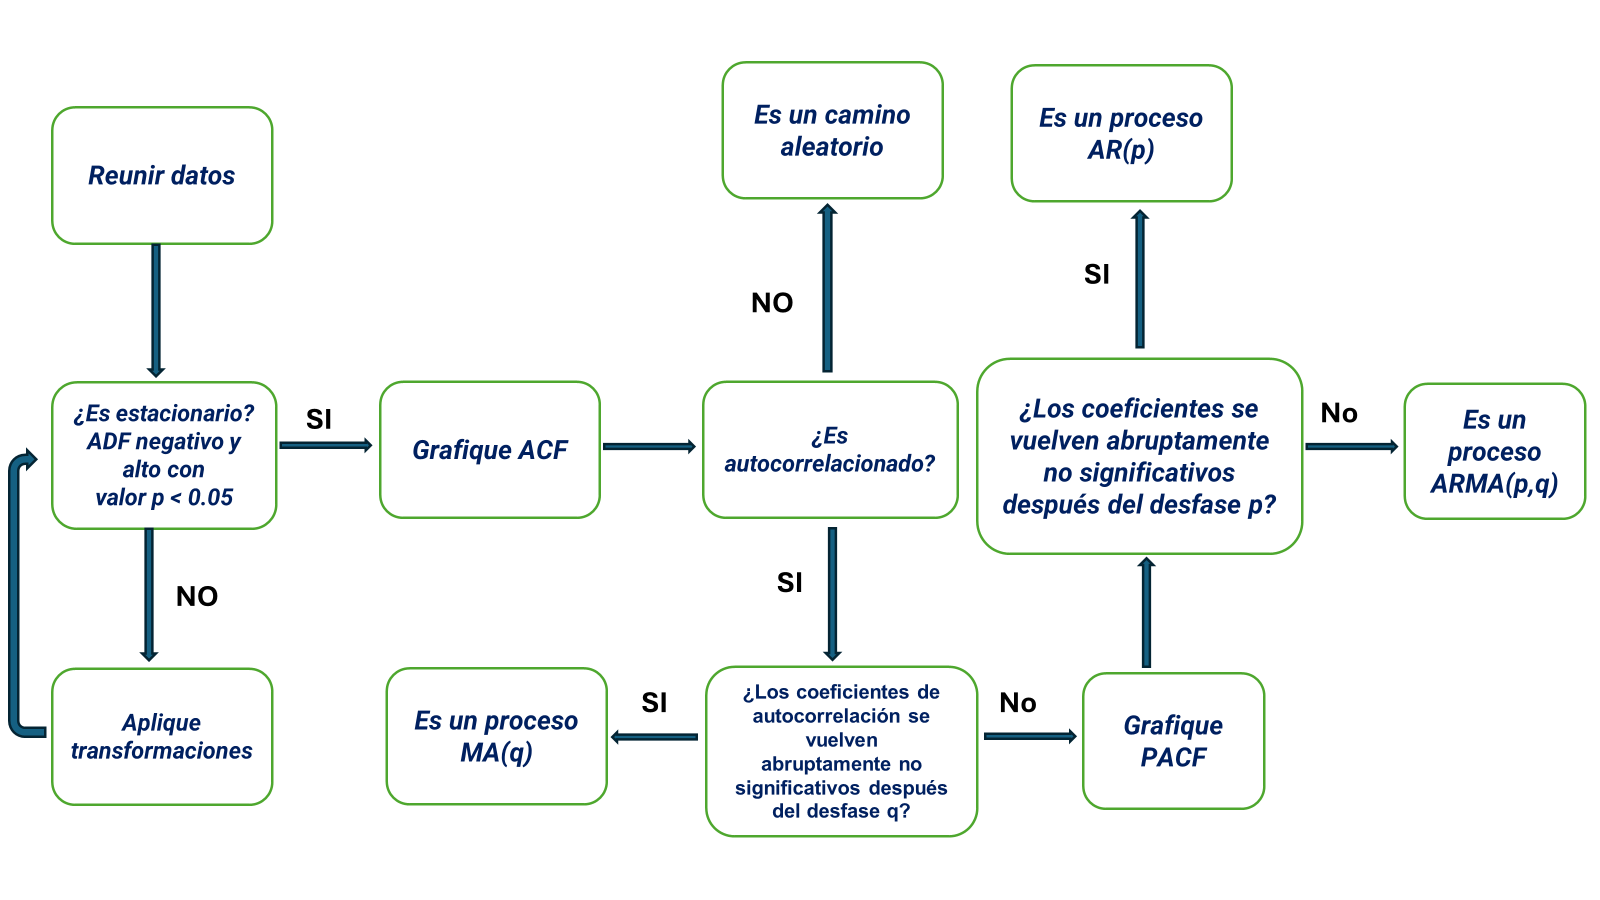

## **Simulando un ARMA(1,1)**
+ Simulamos un proceso ARMA(1,1).
+ Esto equivale a combinar un proceso MA(1) con un proceso AR(1).
+ Específicamente, simularemos el proceso ARMA(1,1) definido en la ecuación 6.7.

+ **Ecuación 6.7**
$$ARMA(1,1) := y_t = 0.33*y_{t –1} +  0.9*ϵ_{t –1}+ ϵ_t $$


### **¿Que objetivos perseguimos con el ejemplo?**
+ El objetivo de esta simulación es demostrar que no podemos utilizar el gráfico ACF para identificar el orden q de un proceso ARMA(p,q), que en este caso es 1, ni podemos utilizar el gráfico PACF para identificar el orden p de un proceso ARMA(p,q), que en este caso también es 1.
+ Utilizaremos la función `ArmaProcess` de la biblioteca statsmodels para simular nuestro proceso ARMA(1,1).
+ Como en los capítulos anteriores, definiremos la matriz de coeficientes para el proceso AR(1), así como para el proceso MA(1).
+ A partir de la ecuación 6.7, sabemos que nuestro proceso AR(1) tendrá un coeficiente de 0,33.
+ **Sin embargo, tenga en cuenta que la función espera tener el coeficiente del proceso autorregresivo con su signo opuesto, ya que así es como se implementa en la biblioteca statsmodels.**
+ Por lo tanto, lo ingresamos como $-0,33$.
+ Para la parte de promedio móvil, la ecuación 6.7 especifica que el coeficiente es $0.9$.
+ Recuerde también que al definir sus matrices de coeficientes, el primer coeficiente siempre es igual a 1, como lo especifica la biblioteca, que representa el coeficiente en el rezago 0.
+ Una vez que se definan nuestros coeficientes, generaremos 1000 puntos de datos.

# **Comenzamos la simulación**

### **Paso 1. Reunir los datos**

In [ ]:
### **Paso 1. Reunir los datos**
from statsmodels.tsa.arima_process import ArmaProcess
import numpy as np

np.random.seed(42)
# Modelo  y_t = 0.33*y_{t –1} +  0.9*ϵ_{t –1}+ ϵ_t
ar1 = np.array([1, -0.33])
ma1 = np.array([1, 0.9])

ARMA_1_1 = ArmaProcess(ar1, ma1).generate_sample(nsample=1000)

### **Paso 2. La Prueba ADF pra estacionariedad**
+ Si el estadistico ADF es negativo y valor p < 0.05 se verifica la estacionaredad

In [ ]:
### **Paso 2. La Prueba ADF pra estacionariedad**
from statsmodels.tsa.stattools import adfuller

ADF_result = adfuller(ARMA_1_1)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -6.429878682042695
p-value: 1.707846668009654e-08


### **Conclusión de la prueba ADF**
+ Esto devuelve una estadística $ADF = -6,43$
+ y un $valor_p = 0.000$
+**Dado que tenemos una estadística ADF negativa grande y un valor p mucho menor que 0,05, podemos concluir que nuestro proceso ARMA(1,1) simulado es estacionario.**

### **Paso 3. Graficamos la función de Autocorelación - ACF**

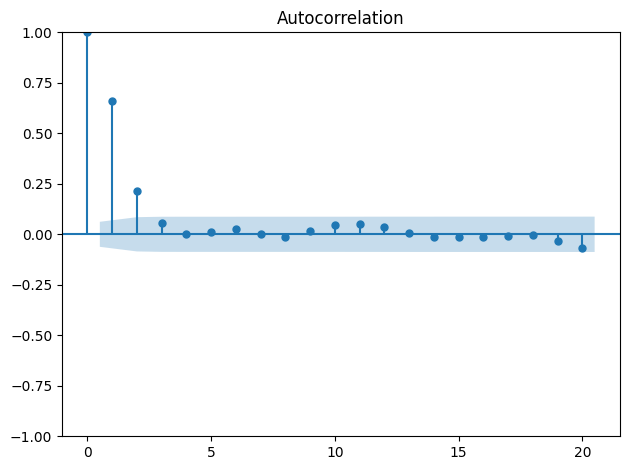

In [ ]:
### **Paso 3. Graficamos la fubción de Autocorelación - ACF**
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(ARMA_1_1, lags=20);

plt.tight_layout()

### **Conclusión del Autocorrelograma**
+ **Figura 6.4 Gráfico ACF de nuestro proceso ARMA(1,1) simulado.**
+ *Observe el patrón sinusoidal en la gráfica, lo que significa que está en juego un proceso $AR( p )$.
+ Además, el último coeficiente significativo está en el retraso 2, lo que sugiere que $q = 2$.
+ Sin embargo, sabemos que simulamos un proceso *ARMA(1,1)*, por lo que *q* debe ser igual a *1*.
+ Por lo tanto, el gráfico *ACF* no se puede utilizar para inferir el orden *q* de un proceso $ARMA( p , q )$ .


### **Paso 4. Graficamos la función de Autocorelación Parcial - PACF**

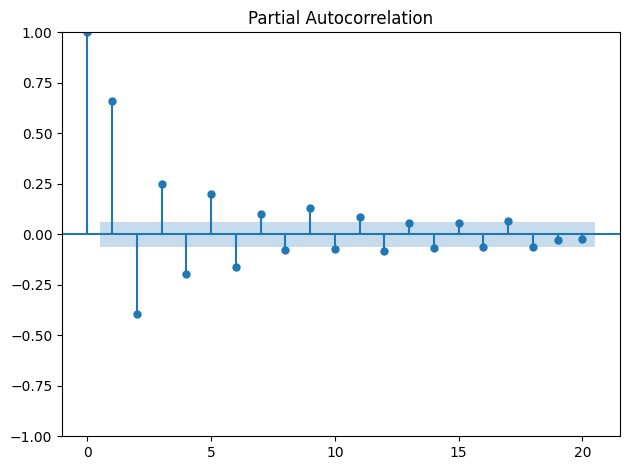

In [ ]:
### **Paso 4. Graficamos la función de Autocorelación Parcial - PACF**
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(ARMA_1_1, lags=20);

plt.tight_layout()

### **Conclusión del Autocorrelograma parcial - PACF**
+ **Figura 6.5 Gráfica PACF de nuestro proceso ARMA(1,1) simulado.**
+ Nuevamente, tenemos un patrón sinusoidal sin un límite claro entre coeficientes significativos y no significativos.
+ A partir de esta gráfica, no podemos inferir que *p = 1* en nuestro proceso ARMA(1,1) simulado, lo que significa que no podemos determinar el orden p de un proceso ARMA(p,q) utilizando una gráfica PACF.


### **Identificación de un proceso $ARMA( p , q )$ estacionario**
+ ***Sin embargo, según la figura 6.4, dado que no existe un límite claro entre los coeficientes significativos y no significativos tanto en los gráficos ACF como en PACF, podemos concluir que tenemos un proceso ARMA(p,q), que de hecho es el caso.***
+ Sabemos que determinar el orden de nuestro proceso es clave en el modelado y la previsión, ya que el orden dictará cuántos parámetros deben incluirse en nuestro modelo.
+ Dado que los gráficos ACF y PACF no son útiles en el caso de un proceso ARMA(p,q), debemos diseñar un procedimiento de modelado general que nos permita encontrar la combinación apropiada de (p,q) para nuestro modelo.
$$Modelo_{ARMA(1,1)}:\  y_t = 0.33*y_{t –1} +  0.9*ϵ_{t –1}+ ϵ_t$$

# **6.4. Diseño de un procedimiento de modelado general**
+ *Hemos simulado un proceso ARMA(1,1) y hemos seguido los pasos de la figura 6.4 para llegar a la conclusión correcta de que tenemos un proceso ARMA(p,q) estacionario, ya que tanto los gráficos ACF como PACF mostraron patrones sinusoidales y no revelar los órdenes q y p respectivamente*.
+ *Ahora sabemos que determinar el orden de nuestro proceso es clave en el modelado y pronóstico, ya que el orden dictará cuántos parámetros deben incluirse en nuestro modelo.*
+ *Dado que los gráficos ACF y PACF no son útiles en el caso de un proceso ARMA(p,q), debemos diseñar un procedimiento de modelado general que nos permita encontrar la combinación adecuada de (p,q) para nuestro modelo.*

+ **Figura 6.6 Procedimiento general de modelado para un proceso ARMA(p,q)** .
+ Los primeros pasos son recopilar los datos, probar la estacionariedad y aplicar las transformaciones correspondientes.
+ Luego definimos una lista de posibles valores para *p* y *q* .
+ Luego ajustamos cada combinación de $ARMA ( p , q )$ a nuestros datos y seleccionamos el modelo con el **AIC** más bajo.
+ Luego realizamos el análisis residual observando el gráfico QQ y el correlograma residual.
+ Si se acercan al **ruido blanco**, el modelo se puede utilizar para realizar predicciones.
+ **De lo contrario, debemos probar diferentes valores para p y q** .

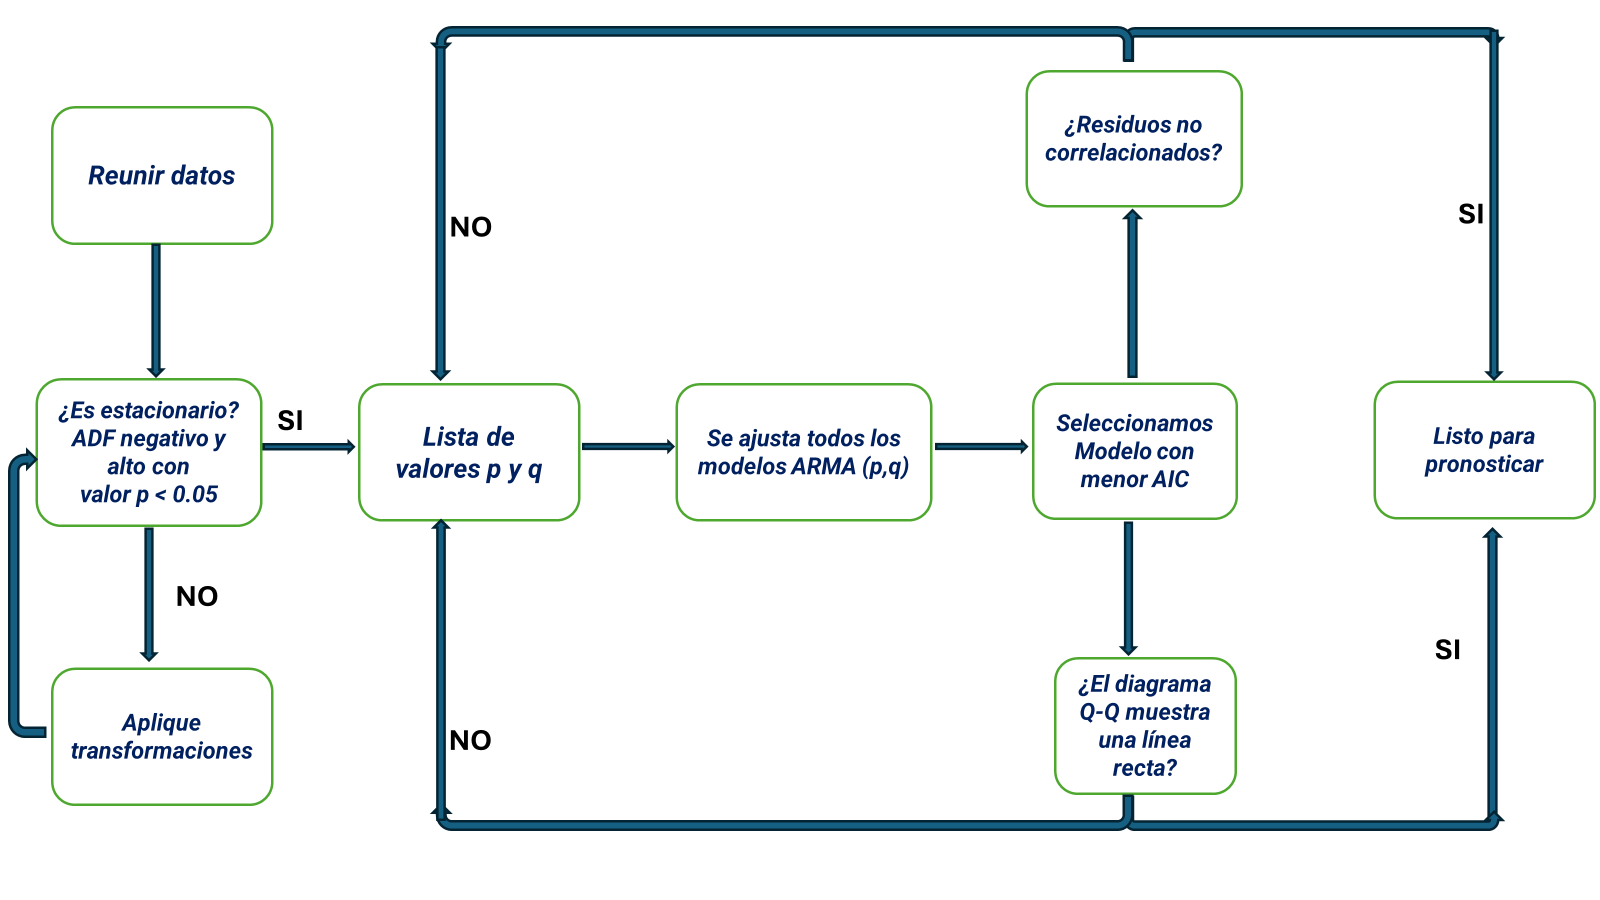

# **6.4.1. Comprensión del criterio de información de Akaike (AIC)**
+ Antes de cubrir los pasos descritos en la figura 6.6, debemos determinar cómo elegiremos el mejor modelo de todos los modelos que encajaremos.
+ Aquí, utilizaremos el **Criterio de información de Akaike** o **AIC** para seleccionar el modelo óptimo.

+ *El AIC estima la calidad de un modelo en relación con otros modelos.*
+ Por eso se utiliza para la selección de modelos.
+ Dado que se perderá cierta información cuando un modelo se ajuste a los datos, el **AIC** cuantifica la cantidad relativa de información perdida por el modelo.
+ Por tanto, cuanto menos información se pierda, mejor será el modelo.
+ En consecuencia, un valor de AIC más bajo se traduce en un mejor modelo.

+ **Ecuación 6.8**
$$AIC = 2k – 2ln(\hat{L})$$



### **Acerca de la informacion $AIC$**
+ Cuanto menor sea el valor del AIC, mejor será el modelo. + Seleccionar según el AIC nos permite mantener un equilibrio entre la complejidad de un modelo y su bondad de ajuste a los datos.

+ El número de parámetros estimados $k$ está directamente relacionado con el orden (p,q) de un modelo ARMA(p,q).
+ Si ajustamos un modelo ARMA(2,2), entonces tenemos $2 + 2 = 4$ parámetros para estimar.
+ Si ajustamos un modelo ARMA(3,4), entonces tenemos $3 + 4 = 7$ parámetros para estimar.
+ Podemos ver cómo el ajuste de un modelo más complejo puede penalizar la puntuación del AIC: **a medida que aumenta el orden (p,q), aumenta el número de parámetros k y, por tanto, aumenta el AIC**.

+ La función de verosimilitud mide la bondad de ajuste de un modelo.
+ Puede verse como lo opuesto a la función de distribución.
+ Dado un modelo con parámetros fijos, la función de distribución medirá la probabilidad de observar un punto de datos.
+ La función de probabilidad invierte la lógica.
+ Dado un conjunto de datos observados, estimará la probabilidad de que diferentes parámetros del modelo generen los datos observados.
+ **Por ejemplo**, *consideremos la situación en la que lanzamos un dado de 6 caras. La función de distribución nos dirá que existe una probabilidad de 1/6 de que observemos cualquiera de estos valores: [1,2,3,4,5,6].*
+ *Ahora, invertimos esta lógica para explicar la función de probabilidad.
+ Supongamos que lanzas un dado **10** veces y obtienes los siguientes valores: [1, 5, 3, 4, 6, 2, 4, 3, 2, 1].
+ Entonces, la función de verosimilitud determinará qué tan probable es que el dado tenga 6 caras.
+ Aplicando esta lógica al contexto de AIC, podemos pensar en la función de probabilidad como una respuesta a la pregunta **¿Qué probabilidad hay de que mis datos observados provengan de un modelo ARMA(1,1)?** .
+ Si es muy probable, es decir, grande, entonces el modelo ARMA(1,1) se ajusta bien a los datos.




+ Por lo tanto, si un modelo se ajusta muy bien a los datos, entonces el valor máximo de probabilidad será alto.
+ Dado que el AIC resta el logaritmo natural del valor máximo de la verosimilitud, representado en la ecuación 6.8, entonces un valor grande de $\hat{L}$ reducirá el AIC.

+ Podemos ver cómo la AIC mantiene un equilibrio entre el desajuste y el sobreajuste.
+ Recuerde que cuanto menor sea el AIC, mejor será el modelo en relación con otros modelos.
+ Por lo tanto, un modelo de sobreajuste tendría un ajuste muy bueno, lo que significa que es grande y el AIC disminuye.
+ Sin embargo, el número de parámetros $k$ también sería grande, lo que penaliza al AIC.






+ **Por lo tanto, el AIC nos permite encontrar un equilibrio entre la cantidad de parámetros en un modelo y un buen ajuste a los datos de entrenamiento.**

+ Finalmente, debemos tener en cuenta que el AIC cuantifica la calidad de un modelo únicamente en relación con otros modelos.
+ Por tanto, es una medida relativa de calidad.
+ En el caso de que ajustemos sólo modelos deficientes a nuestros datos, el AIC simplemente nos ayudará a determinar el mejor del grupo de modelos.
+ Ahora, usemos el AIC para ayudarnos a seleccionar un modelo apropiado para un **proceso ARMA(1,1) simulado**.


# **6.4.2. Selección de un modelo mediante el AIC**
+ A continuación, cubriremos los pasos del procedimiento de modelado general descrito en la figura 6.6 utilizando nuestro proceso ARMA(1,1) simulado.
+ En la sección 6.3, probamos la estacionariedad y concluimos que nuestro proceso simulado ya es estacionario. + Por lo tanto, podemos avanzar para definir una lista de posibles valores para p y q.
+ Si bien conocemos los valores de ambos órdenes a partir de la simulación, consideremos los siguientes pasos como una demostración de que el procedimiento de modelado general funciona.
+ Permitiremos que los valores de *p* y *q* varíen de *0* a *3*.
+ Tenga en cuenta que este rango es arbitrario y puede probar un rango de valores más amplio si lo desea.
+ Crearemos una lista de todas las combinaciones posibles de (p,q), utilizando la función de producto de `itertools`.
+ Dado que hay cuatro valores posibles para *p* y *q*, esto generará una lista de 16 combinaciones únicas de (p,q).

### **Paso 5. Continuamos con nuestro ejercicio simulado - Hallamos todas las combinaciones (p,q)**

In [ ]:
# **Paso 5. Continuamos con nuestro ejercicio simulado - Hallamos todas las combinaciones (p,q)**
from itertools import product

ps = range(0, 4, 1)
qs = range(0, 4, 1)

order_list = list(product(ps, qs)) # generamos todas las combinaciones
print(order_list)

[(0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3)]


### **Paso 6. Listado 6.1 Función para adaptarse a todos los modelos ARMA( p , q ) únicos**

In [ ]:
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
def optimize_arma(
        endog: pd.Series | list, order_l: list) -> pd.DataFrame:
    '''
    Given a list of combinations of p,q test different combinations of arma
    orders, and compare them against each other using Akaike Information
    criterion.

    :param endog typing.Union[pd.Series, list]: the observed time-series process
    :param order_l list: list of all combinations of p and q

    :returns: dataframe with two columns, one the combination of p and q,
        the other the AIC score, the dataframe is already sorted.
    :rtype: pd.DataFrame
    '''

    results = []

    for order in order_l:
        try:
            model = sm.tsa.statespace.SARIMAX(
                endog,
                order = (order[0], 0, order[1]),
                simple_differencing = False,
            )
            model = model.fit(disp = False)
        except:
            continue

        aic = model.aic
        results.append([order, aic])

    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC']

    # sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by = 'AIC', ascending = True)
    result_df = result_df.reset_index(drop = True)

    return result_df

+ Con nuestra función definida, ahora podemos usarla y ajustar los diferentes modelos ARMA(p,q).
+ El resultado se muestra en la figura 6.7. Verá que el modelo con el AIC más bajo corresponde a un modelo ARMA(1,1), que es exactamente el proceso que simulamos.
### **Paso 7. Seleccionamos el modelo con menor AIC**

In [ ]:
### **Paso 7. Seleccionamos el modelo con menor AIC**
result_df = optimize_arma(ARMA_1_1, order_list)
result_df

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,"(p,q)",AIC
0,"(1, 1)",2801.407785
1,"(2, 1)",2802.906070
2,"(1, 2)",2802.967762
3,"(0, 3)",2803.666793
4,"(1, 3)",2804.524027
5,"(3, 1)",2804.588567
6,"(2, 2)",2804.822282
7,"(3, 3)",2806.162939
8,"(2, 3)",2806.175380
9,"(3, 2)",2806.894930


+ **Figura 6.7 Resultado DataFramede ajustar todos los modelos ARMA(p,q) a los datos ARMA(1,1) simulados. Podemos ver que el modelo con el AIC más bajo corresponde a un modelo ARMA(1,1), lo que significa que identificamos con éxito el orden de nuestros datos simulados**.

## **6.4.3. Comprensión del análisis residual**


+ Como se mencionó en la sección anterior, el AIC es una medida de calidad relativa.
+ Aquí, podemos decir que ARMA(1,1) es el mejor modelo en relación con todos los demás modelos que ajustamos a nuestros datos.
+ **Ahora necesitamos una medida absoluta de la calidad del modelo.**
+ Esto nos lleva al siguiente paso de nuestro procedimiento de modelado, que es el análisis de residuos.

+ **Ecuación 6.9**
$$y_t = 0.33*y_{t –1} + 0.9*ϵ_{t –1} + ϵ_t$$

+ Hasta este punto, ajustamos diferentes modelos ARMA(p,q) a nuestro proceso ARMA(1,1) simulado.
+ Utilizando el AIC como criterio de selección de modelos, obtuvimos que un modelo ARMA(1,1) es el mejor modelo en relación con todos los demás que se ajustaron.
+ Ahora debemos medir su calidad absoluta realizando un análisis de los residuos del modelo.

+ **Ecuación 6.10**
$$\hat{y}_t = 0.33*y_{t –1} + 0.9*ϵ_{t –1}$$

### **Paso 8. Es el analisis de los residuos**
+ Esto nos lleva a los últimos pasos antes de pronosticar, que es el análisis de residuos y responder dos preguntas:  
 + ¿el gráfico QQ muestra una línea recta y los residuos no están correlacionados?
 + Si la respuesta a ambas preguntas es sí, entonces tenemos un modelo listo para hacer pronósticos.


+ En caso contrario, debemos probar diferentes combinaciones de (p,q) y reiniciar el proceso.
+ Los residuos serán la diferencia entre los valores provenientes de nuestro modelo y los valores observados de nuestro proceso simulado.
+ En otras palabras, los residuos son la diferencia entre la ecuación 6.9 y la ecuación 6.10. El resultado se muestra en la ecuación 6.11.


+ **Ecuación 6.11**
$$Residual = y_t -\hat{y}_t = ϵ_t$$


+ Ahora supongamos que ajustamos un modelo ARMA(1,1) a nuestro proceso y estimamos los coeficientes del modelo perfectamente, de modo que el modelo se expresa como la ecuación 6.10.


+ **Figura 6.11 El procedimiento general de modelado para un proceso ARMA(p,q)**

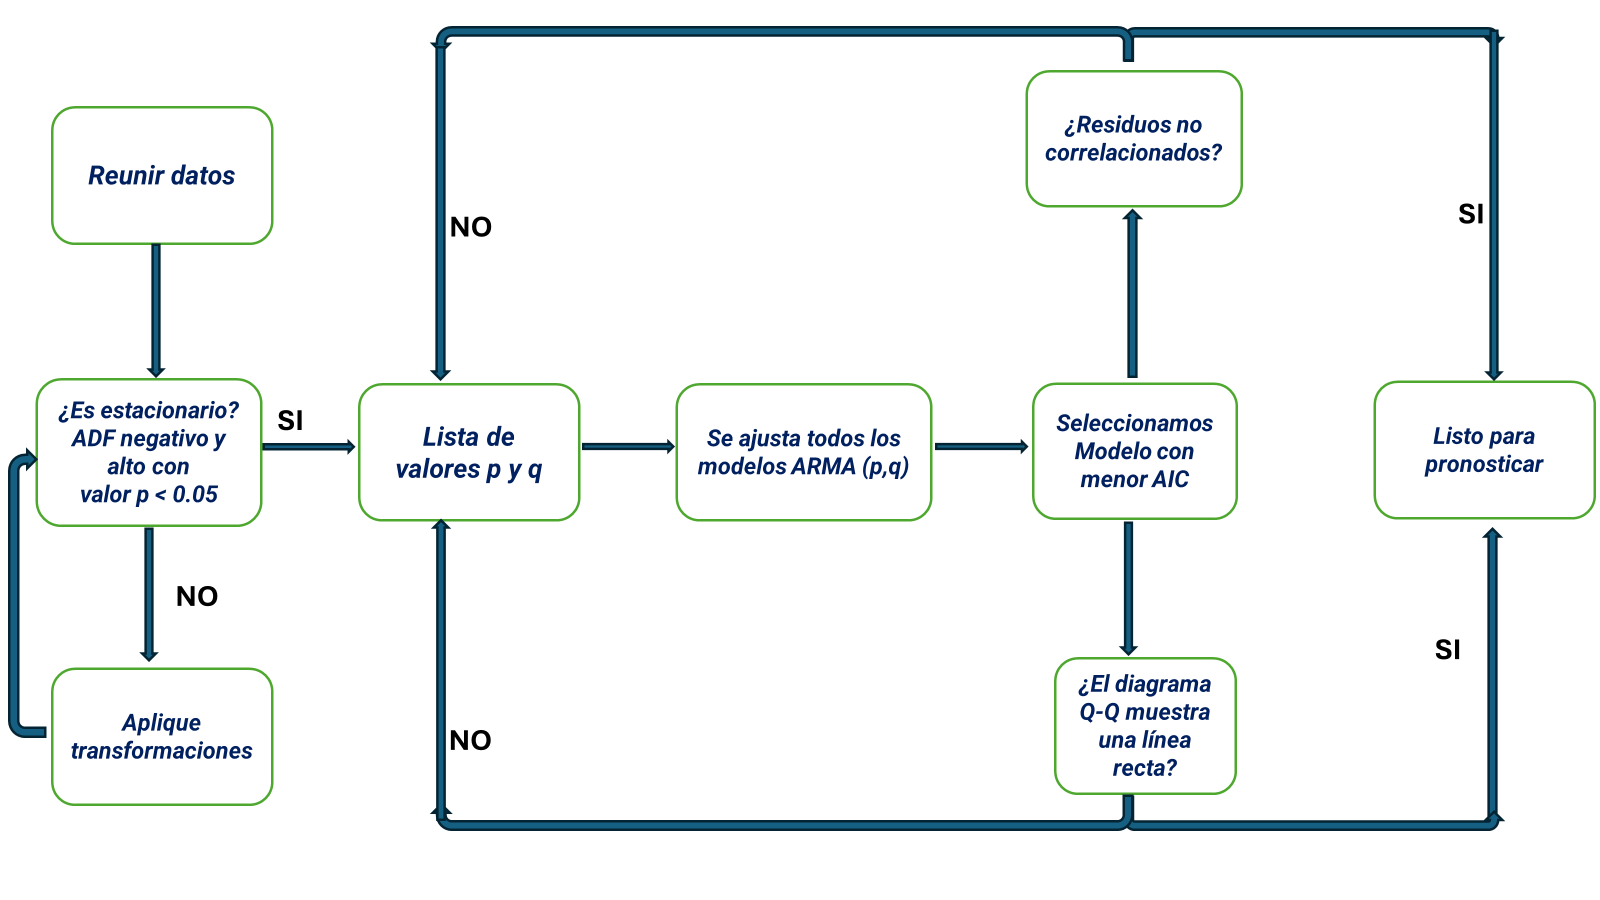

## **Paso 8. El Grafico QQ - método plot_diagnostics**

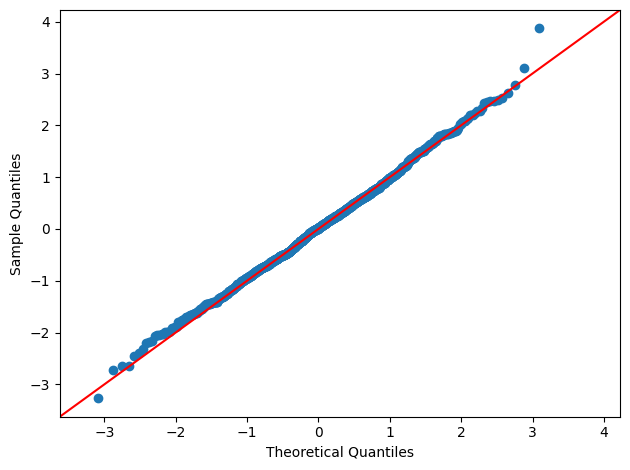

In [ ]:
## **Paso 8. El Grafico QQ**
model = SARIMAX(ARMA_1_1, order=(1,0,1), simple_differencing=False)
model_fit = model.fit(disp=False)
residuals = model_fit.resid

from statsmodels.graphics.gofplots import qqplot
sm.qqplot(residuals, line = '45')
plt.tight_layout()

+ **Figura 6.12 Diagrama Q-Q de nuestros residuos ARMA(1,1). Se puede ver una línea recta gruesa que se encuentra en y = x. Esto significa que nuestros residuos se distribuyen normalmente, como el ruido blanco.**

### **Ampliando el Analisis y el paso Final**
+ Ampliaremos nuestro análisis cualitativo utilizando el *método plot_diagnostics*.
+ Esto genera una figura que contiene cuatro gráficos diferentes, incluido un gráfico Q-Q.
+ El resultado se muestra en la figura 6.13. Puede ver cómo statsmodels nos facilita el análisis cualitativo de los residuos.
+ **El gráfico superior izquierdo muestra los residuos en todo el conjunto de datos. Puede ver que no hay tendencia y la media parece estable a lo largo del tiempo, lo que es indicativo de estacionariedad, al igual que el ruido blanco**.
+ ***El gráfico superior derecho muestra un histograma de los residuos. Puede ver la forma de una distribución normal en este gráfico, lo que nuevamente indica que los residuos están cerca del ruido blanco, ya que el ruido blanco también se distribuye normalmente***.
+ En la parte inferior izquierda, tenemos el gráfico Q-Q, que es idéntico a la figura 6.12 y, por lo tanto, nos lleva a la misma conclusión.
+ Por último, el gráfico inferior derecho muestra la *función de autocorrelación de nuestros residuos*. Puede ver que solo hay un pico significativo en el retardo 0 y no hay coeficientes significativos en el resto de los casos.
+ ***Esto significa que los residuos no están correlacionados, lo que respalda aún más la conclusión de que son similares al ruido blanco, que es lo que esperamos de un buen modelo**.

### **EL paso Final-prueba de Ljung-Box**
+ El paso final en el análisis de residuos es aplicar la **prueba de Ljung-Box**.
+ *Esto nos permite evaluar cuantitativamente si nuestros residuos están realmente no correlacionados*.
+ Usaremos la función `acorr_ljungbox` de statsmodels para realizar la prueba de *Ljung-Box* sobre los residuos.
+ La función toma como entrada los residuos, así como una lista de rezagos.
+ Aquí calcularemos la estadística de Ljung-Box y el valor p para 10 rezagos.


### **método plot_diagnostics**

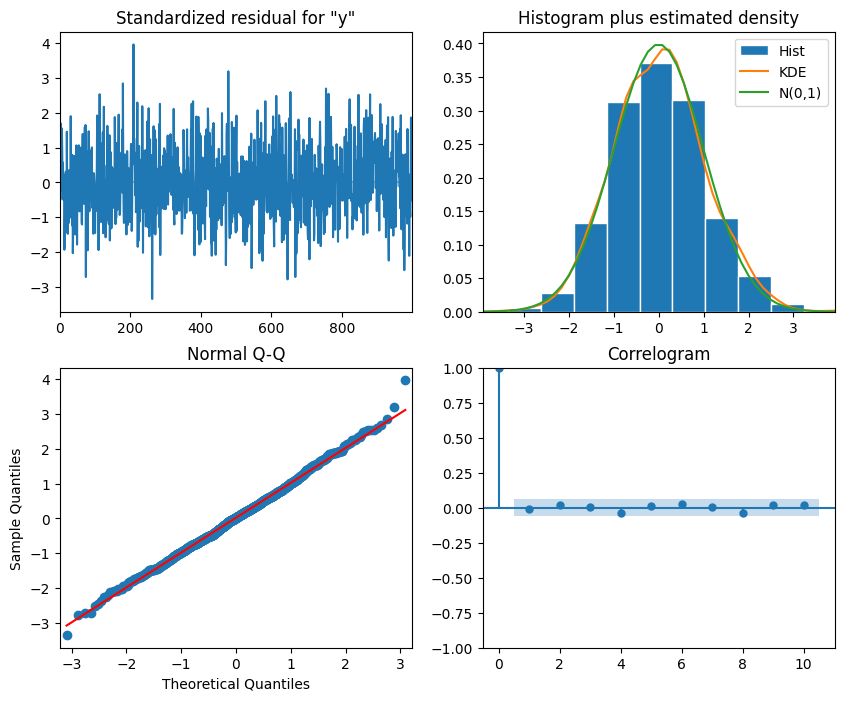

In [ ]:
### **método plot_diagnostics**
model_fit.plot_diagnostics(figsize=(10, 8));

+ **Figura 6.13 Diagnóstico del modelo de statsmodels. El gráfico superior izquierdo muestra los residuos, el histograma de los residuos está en la parte superior derecha, el gráfico Q-Q de los residuos está en la parte inferior izquierda y el gráfico ACF de los residuos está en la parte inferior derecha.**

### **Paso 9. Aplicación del Test de LJUNG-BOX**






In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

lbvalue, pvalue = acorr_ljungbox(residuals, np.arange(1, 11, 1))


print(lbvalue, pvalue)

lb_stat lb_pvalue


In [ ]:
sm.stats.acorr_ljungbox(residuals, lags = [10])

,lb_stat,lb_pvalue
10,5.246805,0.874093


### **Análisis de la prueba Prueba de Ljung-Box**
+ *La hipótesis nula establece que los datos se distribuyen de forma independiente, lo que significa que no existe autocorrelación*.

+ En el pronóstico de series de tiempo, aplicamos la prueba de Ljung-Box a los residuos del modelo para probar si son similares al ruido blanco.
+ **Si el valor p es mayor que 0,05, entonces no podemos rechazar la hipótesis nula, lo que significa que los residuos se distribuyen de forma independiente.**
+ Por lo tanto, *no hay autocorrelación, los residuos son similares al ruido blanco y el modelo se puede utilizar para realizar predicciones*.
+ La lista resultante de valores p muestra que cada uno es superior a 0,05.
+ Por lo tanto, en cada retraso, no se puede rechazar la hipótesis nula, lo que significa que los residuos se distribuyen de forma independiente y no están correlacionados.


# **6.5. Aplicación del procedimiento de modelado general**
+ Ahora contamos con un procedimiento de modelado general que nos permite modelar y pronosticar un modelo ARMA(p,q) general, como se describe en la figura 6.14.
+ Aplicamos este procedimiento a nuestro proceso ARMA(1,1) simulado y descubrimos que el modelo ARMA(1,1) que mejor se ajustaba era el que se esperaba.

+ **Figura 6.14 Procedimiento de modelado general
para un proceso ARMA(p,q)**

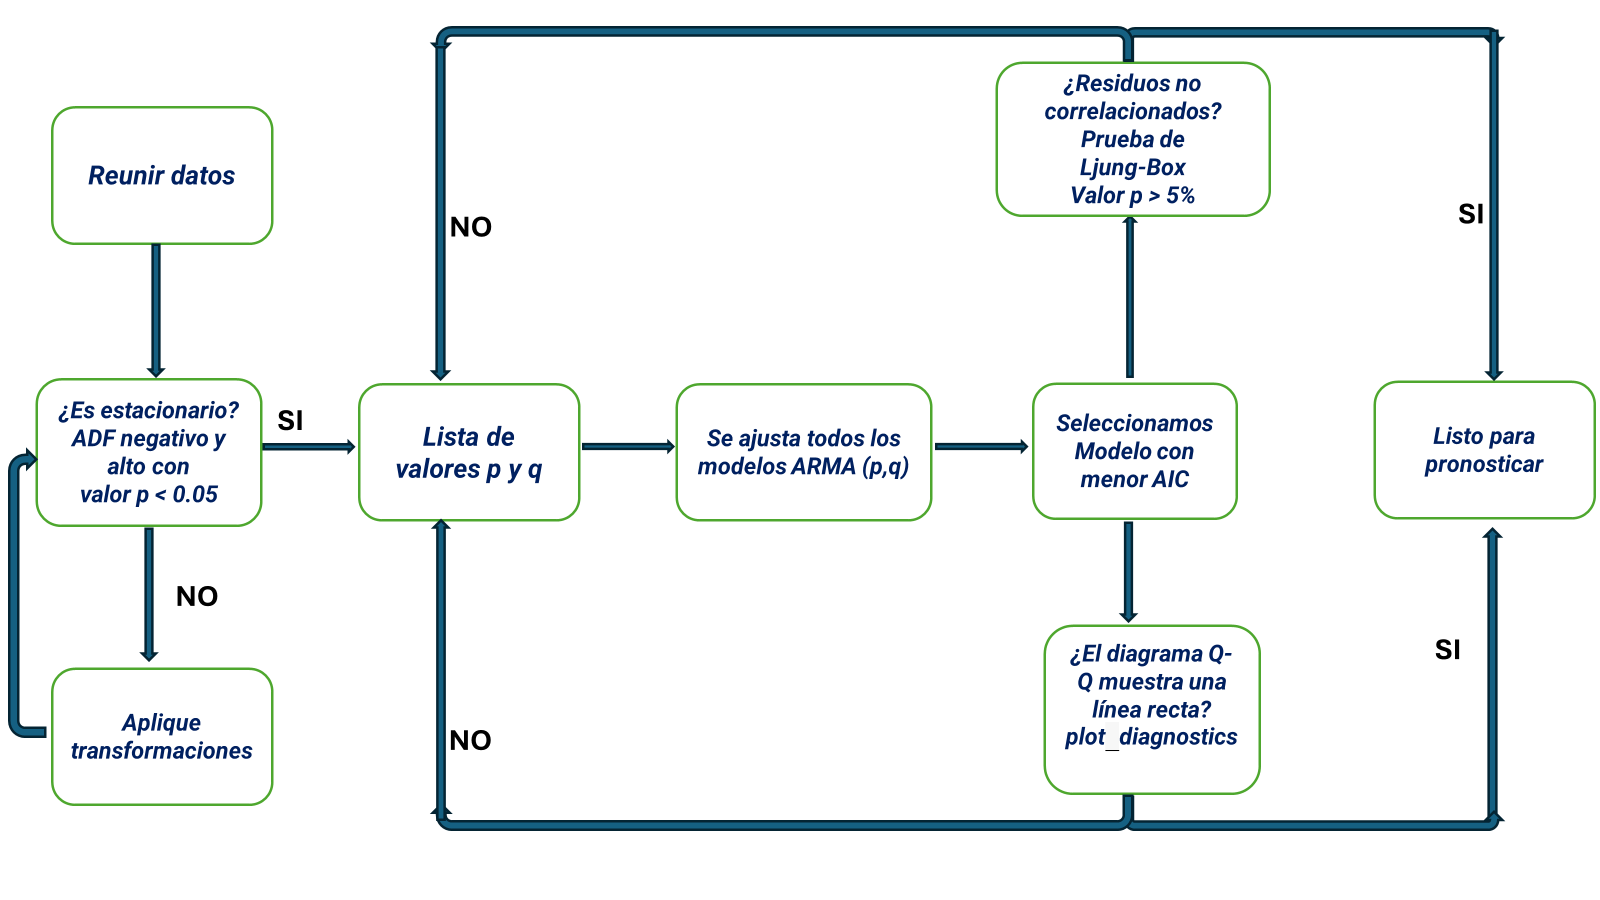

## **6.6. Trabajando con nuestro ejemplo ilustrativo**

## **6.6.1. Ejemplo ilustrativo - Pronósticos del uso de ancho de banda para centros de datos**
+ *Suponga que tiene la tarea de predecir el uso de ancho de banda para un centro de datos grande.*
+ *El ancho de banda se define como la velocidad máxima de datos que se pueden transferir.*
+ *Su unidad base son los bits por segundo (Bps).*
+ *El pronóstico del uso del ancho de banda permite a los centros de datos gestionar mejor sus recursos informáticos.*
+ *En el caso de que se espere un uso menor del ancho de banda, pueden apagar algunos de sus recursos informáticos.*
+ *Esto a su vez reduce los gastos y permite el mantenimiento.*
+ *Por otro lado, si se espera que aumente el uso del ancho de banda, entonces pueden dedicar los recursos necesarios para sostener la demanda y garantizar una baja latencia, manteniendo así a sus clientes satisfechos.*
+ *Para esta situación, hay 10.000 puntos de datos que representan el uso de ancho de banda por hora a partir del 1 de enero de 2019*.
+ *Aquí, el ancho de banda se mide en megabits por segundo (Mbps), lo que equivale a $10^6$ bps.
+ **Podemos visualizar nuestra serie temporal en la figura 6.1.**

### **6.6.2. Realice el paso a paso con nuestro ejemplo Ilustrativo**
+ **Paso 1. Las librerias de necesarias**
+ **Paso 2. Importar los datos**
+ **Paso 3. Dibuje el proceso estudiado ARMA(p,q).**
+ **Paso 4. Ejecute la prueba ADF y verifique si el proceso original es estacionario. Si no lo es, aplique la diferenciación.**
+ **Paso 5. Ejecute la prueba ADF y verifique si el proceso diefenciado es estacionario. Si no lo es, aplique vuelva a diferenciar.**
+ **Paso 6. Dibuje la serie diferenciada ultima estacionaria.**
+ **Paso 7. Dibuje el ACF. Y concluya apropiadamente segun el grafico muestre**
+ **Paso 8. Dibuje el PACF. Y concluya apropiadamente segun el grafico muestre**
+ **Paso 9. Hemos confirmado que nuestro proceso es un ARMA(p,q). Separe la serie simulada en conjuntos de prueba y de entrenamiento de acuerdo al contexto del problema**
+ **Paso 10. Gráfica de las regiones de entrenamiento y de prueba del Modelo ARMA(p,q) para la serie original y la serie diferenciada**
+ **Paso 11. Ajustamos todos los modelos ARMA y calculamos el AIC**
+ **Paso 12. Los residuos se comportan como un ruido blanco - ¿El diagrama Q-Q muestra una línea recta?  - método plot_diagnostics**.
+ **Paso 13. Realice la Prueba de independencia de los residuos- prueba de Ljung-Box y analice los resultados obtenidos**
+ **Paso 14. Verifique si se cumplen todos los pasos previos y si estamos listo para pronosticar**
+ **Paso 15. Haga pronósticos sobre el conjunto de prueba. Utilice el método de la media histórica, el método del último valor conocido y un modelo ARMA(2,2). Utilice la función rolling_forecast y utilice una longitud de ventana adecuada.**
+ **Paso 16. Halle los pronosticos con los tres métodos empleados adecuadamente.**
+ **Paso 17. Dibuje los prosticos con los tres métodos empleados en la serie diferenciada**
+ **Paso 18. Mida el MSE e identifique su modelo campeón.**
+ **Paso 19. Dibuje sus MSE en un gráfico de barras.**
+ **Paso 20. Revertir la Transformación del pronóstico**
+ **Pas0 21. Obtenga el Error absoluto medio (MAE) e interpretelo**

#### **Paso 1. Las librerias de necesarias**

In [ ]:
#### **Paso 1. Las librerias de necesarias**
import itertools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
import sklearn.metrics

In [ ]:
# hacer que los graficos se vean bonitos
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [ ]:
# Ignorar advertencias innecesarias
import warnings
warnings.filterwarnings('ignore')

## **Paso 2. Importando los datos**

In [ ]:
## **Paso 2. Importando los datos**
import pandas as pd

df = pd.read_csv('/content/bandwidth.csv')

df.head() # Muestra las primeras cinco filas de datos.


,hourly_bandwidth
0,1000.496714
1,1000.969408
2,1002.046019
3,1004.702118
4,1007.447816


In [ ]:
print(len(df))

10000


###**Paso 3. Dibuje el proceso estudiado ARMA(p,q).**

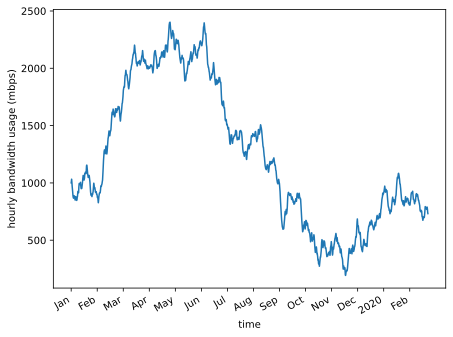

In [ ]:
###**Paso 3. Dibuje el proceso estudiado ARMA(p,q).**
fig, ax = plt.subplots()

ax.plot(df.hourly_bandwidth)
ax.set_xlabel('time')
ax.set_ylabel('hourly bandwidth usage (mbps)')

plt.xticks(
    np.arange(0, 10000, 730),
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
     'Aug', 'Sep', 'Oct', 'Nov', 'Dec', '2020', 'Feb']
)

fig.autofmt_xdate()
plt.tight_layout()


+ **Figura 6.15 Uso de ancho de banda por hora en un centro de datos desde el 1 de enero de 2019. El conjunto de datos contiene 10000 puntos.**
+ Con los datos representados en la figura 6.15, se puede ver que no hay un patrón periódico en los datos.
+ Sin embargo, se observará la presencia de una tendencia a largo plazo, lo que significa que es probable que nuestros datos no sean estacionarios.
+ Apliquemos la prueba ADF para verificar nuestra hipótesis. Nuevamente, utilizaremos la función adfuller de statsmodels e imprimiremos la estadística ADF y el valor p.

####**Paso 4. Ejecute la prueba ADF y verifique si el proceso es estacionario. Si no lo es, aplique la diferenciación.**

In [ ]:
### **Prueba de estacionariedad**
from statsmodels.tsa.stattools import adfuller
ADF_result = adfuller(df['hourly_bandwidth'])

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')
print(f'¿Cuando se rechaza la Hipótesis Nula?')
print(f'Se rechaza si ocurren:')
print(f'ADF = {ADF_result[0]} es negativo y')
print(f'Si valor p ={ADF_result[1]} es menor a 0.05')

ADF Statistic: -0.8714653199452735
p-value: 0.7972240255014551
¿Cuando se rechaza la Hipótesis Nula?
Se rechaza si ocurren:
ADF = -0.8714653199452735 es negativo y
Si valor p =0.7972240255014551 es menor a 0.05


#### **Paso 5. Ejecute la prueba ADF y verifique si el proceso diefenciado es estacionario. Si no lo es, aplique vuelva a diferenciar.**

In [ ]:
### **Nuestra nueva serie a estudiar sera la fiefenciada**
bandwidth_diff = np.diff(df.hourly_bandwidth, n = 1)

In [ ]:
### **Prueba de estacionariedad para la serie diferenciada**
from statsmodels.tsa.stattools import adfuller
ADF_diff = adfuller(bandwidth_diff)

print(f'ADF Statistic: {ADF_diff[0]}')
print(f'p-value: {ADF_diff[1]}')
print(f'¿Cuando se rechaza la Hipótesis Nula?')
print(f'Se rechaza si ocurren:')
print(f'ADF = {ADF_diff[0]} es negativo y')
print(f'Si valor p ={ADF_diff[1]} es menor a 0.05')

ADF Statistic: -20.694853863789017
p-value: 0.0
¿Cuando se rechaza la Hipótesis Nula?
Se rechaza si ocurren:
ADF = -20.694853863789017 es negativo y
Si valor p =0.0 es menor a 0.05


#### **Paso 6. Dibuje la serie diferenciada ultima estacionaria.**

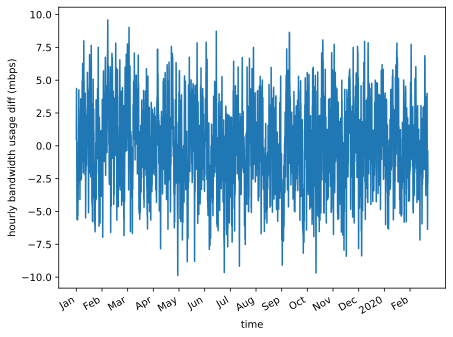

In [ ]:
#### **Paso 6. Dibuje la serie diferenciada ultima estacionaria.**
fig, ax = plt.subplots()

ax.plot(bandwidth_diff)
ax.set_xlabel('time')
ax.set_ylabel('hourly bandwidth usage diff (mbps)')

plt.xticks(
    np.arange(0, 10000, 730),
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
     'Aug', 'Sep', 'Oct', 'Nov', 'Dec', '2020', 'Feb']
)

fig.autofmt_xdate()
plt.tight_layout()

#### **Paso 7. Dibuje el ACF. Y concluya apropiadamente segun el grafico muestre**

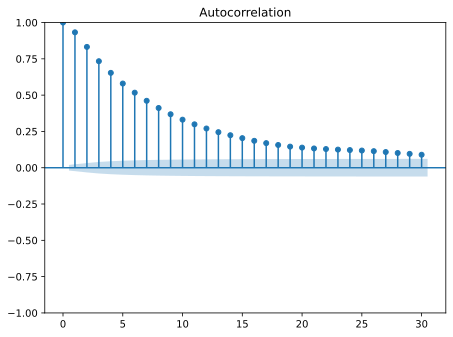

In [ ]:
# **Paso 7. Dibuje el ACF. Y concluya apropiadamente segun el grafico muestre**
sm.graphics.tsa.plot_acf(bandwidth_diff, lags = 30)
plt.tight_layout()

#### **Conclusión acerca del ACF**
+ **Podemos ver una alta correlación después del retraso 0, por lo que el proceso no es un paseo aleatorio**.

#### **Paso 8. Dibuje el PACF. Y concluya apropiadamente segun el grafico muestre**

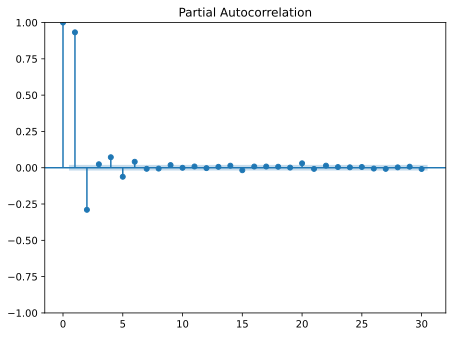

In [ ]:
#### **Paso 8. Dibuje el PACF. Y concluya apropiadamente segun el grafico muestre**

sm.graphics.tsa.plot_pacf(bandwidth_diff, lags = 30)
plt.tight_layout()

#### **Conclusiones del grafico - PACF**
+ Como era de esperar, no podemos obtener el orden de AR a partir de este gráfico debido a su naturaleza sinusoidal.
+ Tendremos que usar el nuevo método que usamos con nuestra simulación anterior.
+ Bien, volvamos a lo que dicen los libros. Grafiquemos la serie diferencial y la normal una al lado de la otra.

### **Paso 9. Hemos confirmado que nuestro proceso es un ARMA(p,q). Separe la serie diferenciada en conjuntos de prueba y de entrenamiento de acuerdo al contexto del problema**
+ Ahora estamos listos para comenzar a modelar nuestro proceso estacionario utilizando un modelo ARMA(p,q).
+ Dividiremos nuestra serie en conjuntos de prueba y de entrenamiento.
+ Aquí conservaremos los últimos 7 días de datos para el conjunto de prueba.
+ Dado que nuestros pronósticos son para las próximas 2 horas, el conjunto de prueba contiene 84 períodos de 2 horas en los que evaluar el rendimiento de nuestros modelos, ya que 7 días de datos horarios suman un total de 168 horas.

In [ ]:
### **Separación en conjunto de Prueba y de entrenamiento para la serie diferenciada**
df_diff = pd.DataFrame({'bandwidth_diff': bandwidth_diff})

train = df_diff[:-168]
test = df_diff[-168:]
print('Tamaños')
print(f'Conjunto de entrenamiento {len(train)}')
print(f'Conjunto de Prueba {len(test)}')
print('En porcentajes')
print(f'Conjunto de entrenamiento {round(len(train)/len(df_diff)*100,1)}')
print(f'Conjunto de Prueba {round(len(test)/len(df_diff)*100,1)}')

Tamaños
Conjunto de entrenamiento 9831
Conjunto de Prueba 168
En porcentajes
Conjunto de entrenamiento 98.3
Conjunto de Prueba 1.7


### **Paso 10. Gráfica de las regiones de entrenamiento y de prueba del Modelo ARMA(p,q) para la serie original y la serie diferenciada**
+ Podemos imprimir la longitud del tren y de los conjuntos de prueba como comprobación de la coherencia y, efectivamente, el conjunto de prueba tiene 168 puntos de datos y el conjunto de tren tiene 9.831 puntos de datos.
+ Ahora visualicemos nuestro conjunto de tren y nuestro conjunto de prueba tanto para la serie diferenciada como para la original.
+ **El gráfico resultante se muestra en la figura 6.16.**

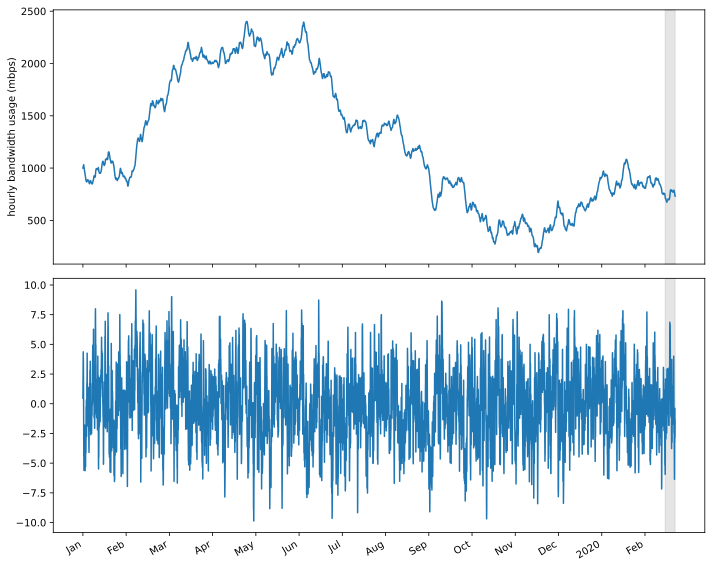

In [ ]:
### **Paso 10. Gráfica de las regiones de entrenamiento y de prueba del Modelo ARMA(p,q)**
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = True, figsize = (10, 8))

ax1.plot(df.hourly_bandwidth)
ax1.set_xlabel('time')
ax1.set_ylabel('hourly bandwidth usage (mbps)')
ax1.axvspan(9831, 10000, color='#808080', alpha=0.2)

ax2.plot(bandwidth_diff)
ax2.axvspan(9830, 9999, color='#808080', alpha=0.2)


plt.xticks(
    np.arange(0, 10000, 730),
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
     'Aug', 'Sep', 'Oct', 'Nov', 'Dec', '2020', 'Feb']
)

fig.autofmt_xdate()
plt.tight_layout()

### **Paso 11. Ajustamos todos los modelos ARMA y calculamos el AIC**
+ Con nuestro conjunto de entrenamiento listo, ahora podemos ajustar diferentes modelos ARMA(p,q) usando la función `optimized_ARMA` que definimos anteriormente.
+ Recuerde que la función toma los datos y la lista de combinaciones únicas (p,q) como entrada.
+ Dentro de la función, inicializamos una lista vacía para almacenar cada combinación (p,q) y su AIC correspondiente.
+ Luego, iteramos sobre cada combinación (p,q) y ajustamos un modelo ARMA(p,q) a nuestros datos.
+ Calculamos el AIC y almacenamos el resultado.
+ Luego, creamos un DataFrame y lo ordenamos por valor de AIC en orden ascendente, ya que cuanto menor sea el AIC, mejor será el modelo.
+ Nuestra función finalmente genera el DataFrame ordenado para que podamos seleccionar el modelo apropiado.
+ La función `optimized_ARMA` se muestra en la siguiente lista.
+ Aquí probaremos valores para p y q que van desde 0 a 3 inclusive.
+ Esto significa que ajustaremos 16 modelos ARMA(p,q) únicos a nuestro conjunto de entrenamiento y seleccionaremos el que tenga el AIC más bajo.
+ No dude en cambiar el rango de valores para p y q, pero tenga en cuenta que un rango más grande dará como resultado que se ajusten más modelos y un tiempo de cálculo más largo.
+ Además, no necesita preocuparse por el sobreajuste: estamos seleccionando nuestro modelo utilizando el AIC, lo que nos impedirá seleccionar un modelo que se sobreajuste.

###**Listado 6.2 Función para ajustar todos los modelos ARMA(p,q) únicos**
+ Iteramos sobre cada combinación (p,q) y ajustamos un modelo ARMA(p,q) a nuestros datos.
+ Calculamos el AIC y almacenamos el resultado.
+ Luego, creamos un DataFrame y lo ordenamos por valor AIC en orden ascendente, ya que cuanto menor sea el AIC, mejor será el modelo.
+ Nuestra función finalmente
genera el DataFrame ordenado para que podamos seleccionar el modelo apropiado. La función optimized_ARMA se muestra en la siguiente lista.

In [ ]:
def optimize_arma(
        endog: pd.Series | list, order_l: list) -> pd.DataFrame:
    '''
    Dada una lista de combinaciones de p,q, pruebe diferentes combinaciones de órdenes arma
     y compárelas entre sí utilizando el criterio de información de Akaike.

:param endogcoding.Union[pd.Series, list]: el proceso de serie temporal observado
:param order_l list: lista de todas las combinaciones de p y q

:returns: marco de datos con dos columnas, una con la combinación de p y q,
la otra con la puntuación AIC; el marco de datos ya está ordenado.
:rtype: pd.DataFrame
    '''

    results = []

    for order in order_l:
        try:
            model = sm.tsa.statespace.SARIMAX(
                endog,
                order = (order[0], 0, order[1]),
                simple_differencing = False,
            )
            model = model.fit(disp = False)
        except:
            continue

        aic = model.aic
        results.append([order, aic])

    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC']

    # sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by = 'AIC', ascending = True)
    result_df = result_df.reset_index(drop = True)

    return result_df

In [ ]:
### **Paso 11. Ajustamos todos los modelos ARMA y calculamos el AIC**
# Crea una lista para nuestros posibles valores de p y q.
ps = range(0, 4)
qs = range(0, 4)

In [ ]:
# Lista de todas las combinaciones únicas de las listas anteriores.
order_l = list(itertools.product(ps, qs))

In [ ]:
# Calculos de (p,q) y el AIC correpondiente al modelo ARMA(p,q)
result_df = optimize_arma(train.bandwidth_diff, order_l)
result_df

,"(p,q)",AIC
0,"(3, 2)",27991.063879
1,"(2, 3)",27991.287509
2,"(2, 2)",27991.603598
3,"(3, 3)",27993.416924
4,"(1, 3)",28003.349550
5,"(1, 2)",28051.351401
6,"(3, 1)",28071.155496
7,"(3, 0)",28095.618186
8,"(2, 1)",28097.250766
9,"(2, 0)",28098.407664


+ **Figura 6.17 Un DataFrame ordenado por valor ascendente de AIC, resultante de ajustar diferentes modelos ARMA(p,q) en el conjunto de datos de ancho de banda diferenciado. Observe cómo los primeros tres modelos tienen un valor de AIC de 27,991.**

#### **Conclusiones del Paso 11. Ajustamos todos los modelos ARMA y calculamos el AIC**
+ Entonces $(p,q)=(3,2)$ serian los ordenas para el AR(3) y MA(2)
+ Sin embargo, el AIC en (3,2), (2,3) y (2,2) son bastante similares
+ El autor recomienda usar $(p,q)=(2,2)$ ya que el modelo es menos complejo.
+ Construyamos el modelo entonces $ARMA(2,2)$
+ El DataFrame resultante se muestra en la figura 6.17. Observará que los tres primeros modelos tienen un AIC de 27.991, con solo pequeñas diferencias.
+ Por lo tanto, yo diría que el modelo ARMA(2,2) es el modelo que se debe seleccionar.
+ Su valor AIC es muy cercano a los modelos ARMA(3,2) y ARMA(2,3), aunque es menos complejo, ya que tiene cuatro parámetros para estimar en lugar de cinco.
+ Por lo tanto, seleccionaremos el modelo ARMA(2,2) y pasaremos a los siguientes pasos, que es el análisis de los residuos del modelo.

## **Paso 12. Los residuos se comportan como un ruido blanco - ¿El diagrama Q-Q muestra una línea recta?  - método plot_diagnostics**

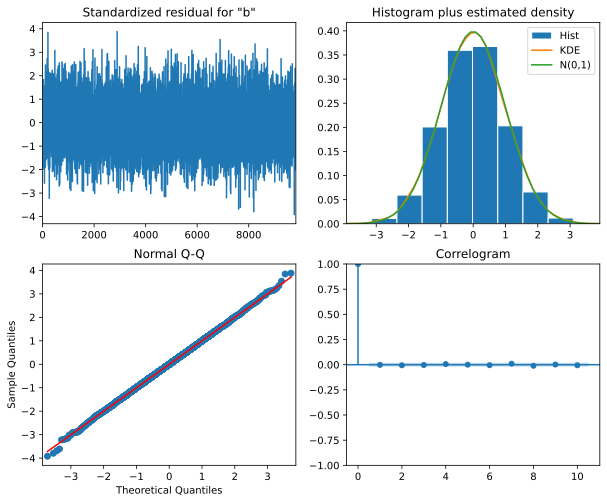

In [ ]:
# **Paso 12. Los residuos se comportan como un ruido blanco**
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train['bandwidth_diff'], order=(2,0,2), simple_differencing=False)
model_fit = model.fit(disp=False)

model_fit.plot_diagnostics(figsize=(10, 8));

+ **Figura 6.18 Diagnóstico del modelo de statsmodels. El gráfico superior izquierdo muestra los residuos, el histograma de los residuos está en la parte superior derecha, el gráfico Q-Q de los residuos está en la parte inferior izquierda y el gráfico ACF de los residuos está en la parte inferior derecha.**

#### **Conclusiones acerca del Paso 12**
+ En la figura 6.18 se puede ver que el gráfico superior izquierdo no muestra ninguna tendencia y que la media parece constante a lo largo del tiempo, lo que significa que nuestros residuos probablemente sean estacionarios.
+ En la parte superior derecha se muestra un gráfico de densidad con una forma similar a la de una distribución normal.
+ El gráfico Q-Q en la parte inferior izquierda muestra una línea recta gruesa que está muy cerca de y = x.
+ Por último, el gráfico ACF en la parte inferior derecha no muestra autocorrelación después del retardo 0.
+ Por lo tanto, la figura 6.18 indica que nuestros residuos se parecen claramente al **ruido blanco**, ya que se distribuyen normalmente y no están correlacionados.

### **Paso 13. Prueba de independencia de los residuos- prueba de Ljung-Box**
+ Nuestro último paso es ejecutar la prueba de Ljung-Box en los residuos para los primeros 10 retardos.
+ Si los valores p devueltos superan 0,05, no podemos rechazar la hipótesis nula, lo que significa que nuestros residuos no están correlacionados y se distribuyen de forma independiente, al igual que el ruido blanco.

In [ ]:
# **Paso 13. Prueba de independencia de los residuos- prueba de Ljung-Box**
residuals = model_fit.resid
sm.stats.acorr_ljungbox(residuals, lags = range(1, 11))

,lb_stat,lb_pvalue
1,0.042190,0.837257
2,0.418364,0.811247
3,0.520271,0.914416
4,0.850554,0.931545
5,0.850841,0.973678
6,1.111754,0.981019
7,2.124864,0.952607
8,3.230558,0.919067
9,3.248662,0.953615
10,3.588289,0.964015


#### **Análisis de la prueba Prueba de Ljung-Box**
+ *La hipótesis nula establece que los datos se distribuyen de forma independiente, lo que significa que no existe autocorrelación*.

+ En el pronóstico de series de tiempo, aplicamos la prueba de Ljung-Box a los residuos del modelo para probar si son similares al ruido blanco.
+ **Si el valor p es mayor que 0,05, entonces no podemos rechazar la hipótesis nula, lo que significa que los residuos se distribuyen de forma independiente.**
+ Por lo tanto, *no hay autocorrelación, los residuos son similares al ruido blanco y el modelo se puede utilizar para realizar predicciones*.
+ La lista resultante de valores p muestra que cada uno es superior a 0,05.
+ Por lo tanto, en cada retraso, no se puede rechazar la hipótesis nula, lo que significa que los residuos se distribuyen de forma independiente y no están correlacionados.

### **Paso 14. Verificando si se cumplen todos los pasos previos y si estamos listo para pronosticar**

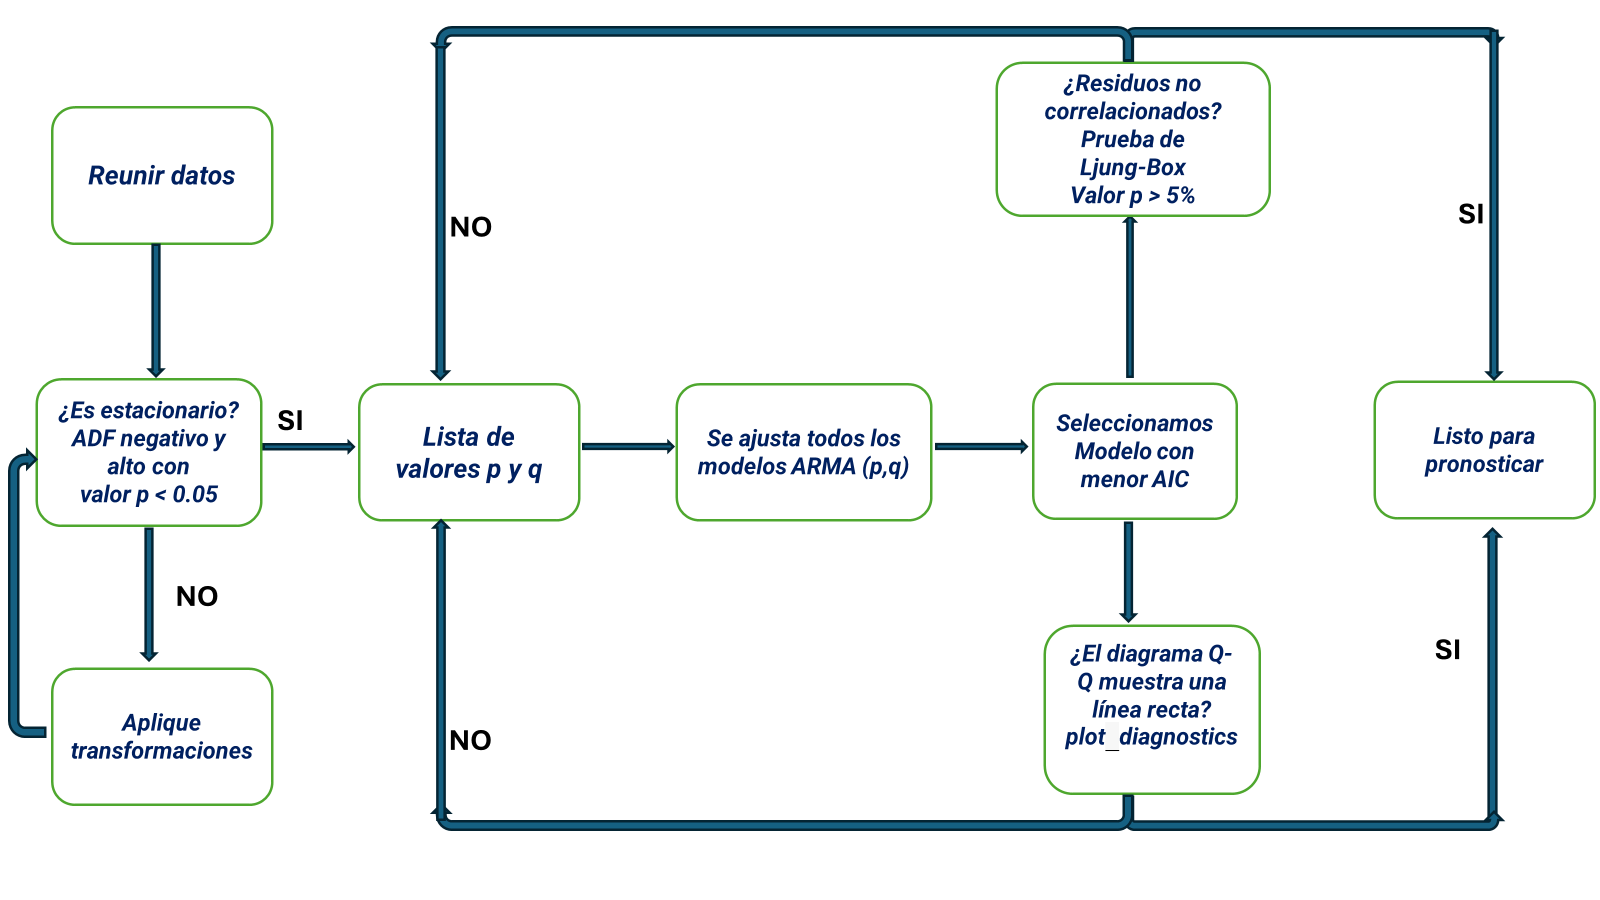

#### **Paso 15. Haga pronósticos sobre el conjunto de prueba. Utilice el método de la media histórica, el método del último valor conocido y un modelo ARMA(2,2). Utilice la función `rolling_forecast` y utilice una longitud de ventana adecuada.**

+ Usaremos el modelo ARMA(2,2) para pronosticar las próximas 2 horas de uso de ancho de banda durante 7 días.
+ Reutilizaremos la función `rolling_forecast` que definimos y anteriormente.
+ *Recuerde que esta función nos permite pronosticar algunos intervalos de tiempo a la vez, hasta que tengamos pronósticos para todo el horizonte*
+ Ajustaremos un modelo ARMA(2,2) a nuestros datos diferenciados.
+  Además, compararemos el rendimiento del modelo con dos puntos de referencia: **la media y el último valor conocido**.
+ Esto nos permitirá asegurarnos de que un modelo ARMA(2,2) funciona mejor que los métodos de pronóstico ingenuos.

In [ ]:
# **Paso 15. Haga pronósticos sobre el conjunto de prueba**.
def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int, window: int, method: str) -> list:

    total_len = train_len + horizon
    end_idx = train_len

    if method == 'mean':
        pred_mean = []

        for i in range(train_len, total_len, window):
            mean = np.mean(df[:i].values)
            pred_mean.extend(mean for _ in range(window))

        return pred_mean

    elif method == 'last':
        pred_last_value = []

        for i in range(train_len, total_len, window):
            last_value = df[:i].iloc[-1].values[0]
            pred_last_value.extend(last_value for _ in range(window))

        return pred_last_value

    elif method == 'ARMA':
        pred_ARMA = []

        for i in range(train_len, total_len, window):
            model = SARIMAX(df[:i], order=(2,0,2))
            res = model.fit(disp=False)
            predictions = res.get_prediction(0, i + window - 1)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_ARMA.extend(oos_pred)

        return pred_ARMA

#### **Paso 16. Halle los pronosticos con los tres métodos empleados adecuadamente.**

In [ ]:
pred_df = test.copy()
TRAIN_LEN = len(train)
HORIZON = len(test)
WINDOW = 2

pred_mean = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'mean')
pred_last_value = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'last')
pred_ARMA = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'ARMA')


test.loc[:, 'pred_mean'] = pred_mean
test.loc[:, 'pred_last_value'] = pred_last_value
test.loc[:, 'pred_ARMA'] = pred_ARMA
pred_df.head()

,bandwidth_diff,pred_mean,pred_last_value,pred_ARMA
9831,-5.943995,-0.028214,-5.791207,-5.460661
9832,-5.865194,-0.028214,-5.791207,-4.890626
9833,-3.197066,-0.029410,-5.865194,-5.335905
9834,-1.090197,-0.029410,-5.865194,-4.751731
9835,0.665291,-0.029840,-1.090197,-0.375596


### **Paso 17. Dibuje los prosticos con los tres métodos empleados en la serie diferenciada**

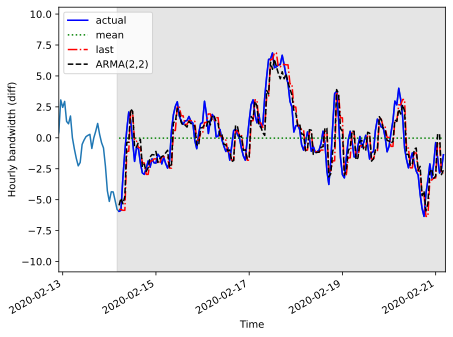

In [ ]:
# **Paso 17. Dibuje los prosticos con los tres métodos empleados en la serie diferenciada**
fig, ax = plt.subplots()

ax.plot(df_diff['bandwidth_diff'])

ax.plot(test['bandwidth_diff'], 'b-', label = 'actual')
ax.plot(test['pred_mean'], 'g:', label = 'mean')
ax.plot(test['pred_last_value'], 'r-.', label = 'last')
ax.plot(test['pred_ARMA'], 'k--', label = 'ARMA(2,2)')

ax.legend(loc = 2)

ax.set_ylabel('Hourly bandwidth (diff)')
ax.set_xlabel('Time')

ax.axvspan(9830, 9999, color='#808080', alpha=0.2)

ax.set_xlim(9800, 9999)


plt.xticks(
    [9802, 9850, 9898, 9946, 9994],
    ['2020-02-13', '2020-02-15', '2020-02-17', '2020-02-19', '2020-02-21'])

fig.autofmt_xdate()
plt.tight_layout()

+ **Figura 6.19 Pronósticos del uso de ancho de banda horario diferenciado utilizando la media, el último valor conocido y un modelo ARMA(2,2). Puede ver cómo los pronósticos ARMA(2,2) y los pronósticos del último valor conocido casi coinciden con los valores reales del conjunto de prueba.**

### **Interpretando el grafico de los pronosticos**
+ En la figura 6.19 se puede ver que los pronósticos de ARMA(2,2), que se muestran como una línea discontinua, casi coinciden con los valores reales del conjunto de prueba.
+ Lo mismo se puede decir de los pronósticos del método del último valor conocido, que se muestran como una línea discontinua y punteada.
+ Por supuesto, los pronósticos que utilizan la media, que se muestran como una línea punteada, son completamente estables durante el período de prueba.

### **Paso 18. Mida el MSE e identifique su modelo campeón.**
+ Ahora mediremos el error cuadrático medio (MSE) para evaluar el rendimiento de cada modelo.
+ El modelo con el MSE más bajo es el modelo con mejor rendimiento.

In [ ]:
# **Paso 18. Mida el MSE e identifique su modelo campeón.**
from sklearn.metrics import mean_squared_error

mse_mean = mean_squared_error(test['bandwidth_diff'], test['pred_mean'])
mse_last = mean_squared_error(test['bandwidth_diff'], test['pred_last_value'])
mse_ARMA = mean_squared_error(test['bandwidth_diff'], test['pred_ARMA'])

print('El MSE  con los diferentes metodos ingenuos y ARMA(2,2)')
print(f'El Error MSE con la media historica es {round(mse_mean,2)}')
print(f'El Error MSE la última observación es {round(mse_last,2)}')
print(f'El Error MSE con la ARMA(2,2) es {round(mse_ARMA,2)}')

El MSE  con los diferentes metodos ingenuos y ARMA(2,2)
El Error MSE con la media historica es 6.31
El Error MSE la última observación es 2.23
El Error MSE con la ARMA(2,2) es 1.77


#### **Paso 19. Dibuje sus MSE en un gráfico de barras.**

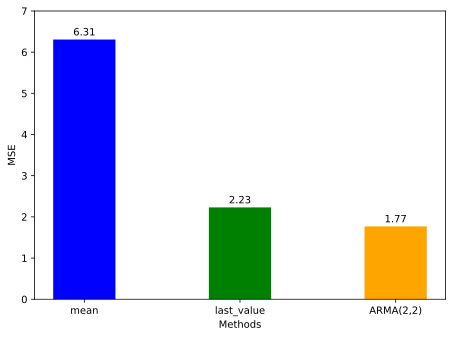

In [ ]:
## **Paso 19. Dibuje sus MSE en un gráfico de barras.**
import matplotlib.pyplot as plt

# Datos
x = ['mean', 'last_value', 'ARMA(2,2)']
y = [mse_mean, mse_last, mse_ARMA]

# Colores para las barras (puedes modificar esta lista según tus preferencias)
colors = ['blue', 'green', 'orange']

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Graficar las barras con colores específicos
bars = ax.bar(x, y, width=0.4, color=colors)

# Etiquetas y límites del eje y
ax.set_xlabel('Methods')
ax.set_ylabel('MSE')
ax.set_ylim(0, 7)

# Añadir texto con los valores encima de cada barra
for bar, value in zip(bars, y):
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() + 0.05,
             round(value, 2),
             ha='center', va='bottom')

# Ajustar el diseño y guardar la figura
plt.tight_layout()
plt.savefig('figures.png', dpi=300)
plt.show()


#### **Conclusiones Acerca del MSE**

+ Tenemos un MSE de 6,3 para el método de la media, 2,2 para el método del último valor conocido y 1,8 para el modelo ARMA(2,2).
+ El modelo ARMA(2,2) supera los puntos de referencia, lo que significa que tenemos un modelo de buen rendimiento.

## **Paso 20. Revertir la Transformación del pronóstico**
+ El paso final es revertir la transformación de nuestro pronóstico para llevarlo a la misma escala que nuestros datos originales.
+ Recuerde que diferenciamos los datos originales para hacerlos estacionarios.
+ Luego, se aplicó el modelo ARMA(2,2) al conjunto de datos estacionarios y se produjeron pronósticos que están diferenciados.
+ Para revertir la transformación de diferenciación, podemos aplicar una suma acumulativa, tal como lo hicimos en los capítulos 4 y 5.

In [ ]:
df['pred_bandwidth'] = pd.Series()
df['pred_bandwidth'][9832:] = df['hourly_bandwidth'].iloc[9832] + pred_df['pred_ARMA'].cumsum()

+ **Luego podemos trazar los pronósticos en la escala original de los datos**.

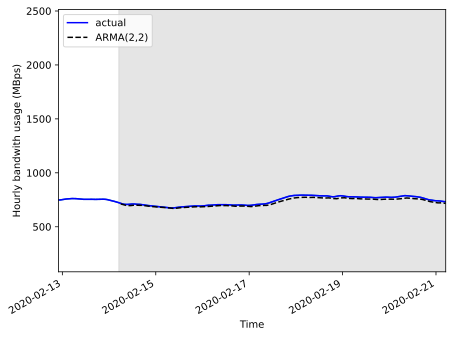

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.plot(df['hourly_bandwidth'])
ax.plot(df['hourly_bandwidth'], 'b-', label='actual')
ax.plot(df['pred_bandwidth'], 'k--', label='ARMA(2,2)')

ax.legend(loc=2)

ax.set_xlabel('Time')
ax.set_ylabel('Hourly bandwith usage (MBps)')

ax.axvspan(9831, 10000, color='#808080', alpha=0.2)
ax.set_xlim(9800, 9999)

plt.xticks(
[9802, 9850, 9898, 9946, 9994],
['2020-02-13', '2020-02-15', '2020-02-17', '2020-02-19', '2020-02-21'])
fig.autofmt_xdate()
plt.tight_layout()

+ **Figure 6.20 Predicciones indiferenciadas del uso de ancho de banda por hora. Observe cómo la línea discontinua que representa nuestras predicciones casi coincide con la línea continua que representa los valores reales. Esto significa que nuestras predicciones son muy cercanas a los valores reales, lo que indica un modelo de alto rendimiento.**

## **Paso 21. Obtenga el Error absoluto medio (MAE)**
+ Podemos medir el error absoluto medio (MAE) de las predicciones ARMA(2,2) indiferenciadas para entender qué tan lejos están las predicciones de los valores reales.
+ Usaremos el MAE simplemente porque es fácil de interpretar.

In [ ]:
## **Paso 21. Obtenga el Error absoluto medio (MAE)**
from sklearn.metrics import mean_absolute_error

mae_arma_undiff = sklearn.metrics.mean_absolute_error(df['hourly_bandwidth'][9832:], df['pred_bandwidth'][9832:])


print(f'Error absoluto medio MAE ={mae_arma_undiff}')

Error absoluto medio MAE =14.000362773294084


#### **Interpretacion del MAE**
+ Podemos medir el error absoluto medio (MAE) de las predicciones ARMA(2,2) no diferenciadas para entender qué tan lejos están las predicciones de los valores reales.
+ Esto devuelve un MAE de 14, lo que significa que, en promedio, nuestras predicciones están 14 Mbps por encima o por debajo del uso real del ancho de banda.
+ Usaremos el MAE simplemente porque es fácil de interpretar.

# **Resumen del capitulo 6**
+ El modelo de promedio móvil autorregresivo, denominado ARMA(p,q), es la combinación del modelo autorregresivo AR(p) y el modelo de promedio móvil MA(q).
+ Un proceso ARMA(p,q) mostrará un patrón decreciente o un patrón sinusoidal en los gráficos ACF y PACF. Por lo tanto, no se pueden utilizar para estimar los órdenes p y q.
+ El procedimiento de modelado general no se basa en los gráficos ACF y PACF. En cambio, ajustamos muchos modelos ARMA(p,q) y realizamos la selección de modelos y el análisis de residuos.
+ La selección de modelos se realiza con el criterio de información de Akaike (AIC). Cuantifica la pérdida de información de un modelo y está relacionada con la cantidad de parámetros en un modelo y su bondad de ajuste. Cuanto menor sea el AIC, mejor será el modelo.
+ El AIC es una medida relativa de calidad. Devuelve el mejor modelo entre otros modelos. Para una medida absoluta de calidad, realizamos un análisis de residuos.
+ Los residuos de un buen modelo deben aproximarse al ruido blanco, lo que significa que deben no estar correlacionados, distribuirse normalmente y ser independientes.
+ El gráfico Q-Q es una herramienta gráfica para comparar dos distribuciones. Lo utilizamos para comparar la distribución de los residuos con una distribución normal teórica.
Si el gráfico muestra una línea recta que se encuentra en y = x, entonces ambas distribuciones son similares.
De lo contrario, significa que los residuos no se distribuyen normalmente.
+ La prueba de Ljung-Box nos permite determinar si los residuos están correlacionados o no. La hipótesis nula establece que los datos se distribuyen de forma independiente y no están correlacionados. Si los valores p devueltos son mayores que 0,05, no podemos rechazar la hipótesis nula, lo que significa que los residuos no están correlacionados, al igual que el ruido blanco.